In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import YearLocator, DateFormatter
import seaborn as sns
import numpy as np

# Preprocessing

In [2]:
df= pd.read_csv('data/train.csv', delimiter=',')

In [3]:
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [4]:
df

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       ID00001       0.515874        0.05             0.644231           C1   
1       ID00002       0.672619        0.02             0.375000           C2   
2       ID00003       0.841110        0.02             0.384615           C3   
3       ID00004       0.900277        0.11             0.432692           C4   
4       ID00005       0.596403        0.11             0.634615           C5   
...         ...            ...         ...                  ...          ...   
58587   ID58588       0.355089        0.13             0.644231           C8   
58588   ID58589       1.199642        0.02             0.519231          C14   
58589   ID58590       1.162273        0.05             0.451923           C5   
58590   ID58591       1.236307        0.14             0.557692           C8   
58591   ID58592       0.124429        0.02             0.442308           C8   

       population_density  make segment model fuel_type     max_torque  \
0                    4990     1       A    M1       CNG   60Nm@3500rpm   
1                   27003     1       A    M1       CNG   60Nm@3500rpm   
2                    4076     1       A    M1       CNG   60Nm@3500rpm   
3                   21622     1      C1    M2    Petrol  113Nm@4400rpm   
4                   34738     2       A    M3    Petrol   91Nm@4250rpm   
...                   ...   ...     ...   ...       ...            ...   
58587                8794     2       A    M3    Petrol   91Nm@4250rpm   
58588                7788     1       A    M1       CNG   60Nm@3500rpm   
58589               34738     1       A    M1       CNG   60Nm@3500rpm   
58590                8794     1      B2    M6    Petrol  113Nm@4400rpm   
58591                8794     3      C2    M4    Diesel  250Nm@2750rpm   

               max_power         engine_type  airbags is_esc  \
0       40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1       40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2       40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3       88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4       67.06bhp@5500rpm             1.0 SCe        2     No   
...                  ...                 ...      ...    ...   
58587   67.06bhp@5500rpm             1.0 SCe        2     No   
58588   40.36bhp@6000rpm   F8D Petrol Engine        2     No   
58589   40.36bhp@6000rpm   F8D Petrol Engine        2     No   
58590   88.50bhp@6000rpm   K Series Dual jet        2     No   
58591  113.45bhp@4000rpm       1.5 L U2 CRDi        6    Yes   

      is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                         No      No                Yes                No   
1                         No      No                Yes                No   
2                         No      No                Yes                No   
3                        Yes      No                Yes               Yes   
4                         No      No                 No               Yes   
...                      ...     ...                ...               ...   
58587                     No      No                 No               Yes   
58588                     No      No                Yes                No   
58589                     No      No                Yes                No   
58590                    Yes      No                Yes                No   
58591                    Yes     Yes                Yes               Yes   

      rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0                 Drum           796         3            Manual         5   
1                 Drum           796         3            Manual         5   
2                 Drum           796         3            Manual         5   
3                 Drum          1197         4         Automatic         5   
4                 Drum           999         3         Automatic        

In [5]:
encoding = ['steering_type', 'transmission_type', 'rear_brakes_type', 
                     'engine_type', 'fuel_type', 'model', 'segment', 'area_cluster', 'max_torque', 'max_power']

# TODO: better encoding for max_torque and max_power 

for column in encoding:
    df = pd.get_dummies(df, columns=[column], prefix=column)

In [6]:
encoding_col= ['is_parking_sensors', 'is_adjustable_steering', 
               'is_esc', 'is_tpms', 'is_parking_camera','is_front_fog_lights', 
               'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 
               'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 
               'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw',
               'is_speed_alert'] 

for column in encoding_col:
    df[column] = df[column].map({'Yes': 1, 'No': 0})


In [25]:
numerical_columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density',
                     'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius',
                     'length', 'width', 'height', 'gross_weight', 'ncap_rating']

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

numerical_df = df.select_dtypes(include=['number'])
numerical_df = numerical_df.drop(columns=['policy_id'])

In [24]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         0 non-null      float64
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   airbags                           58592 non-null  int64  
 7   is_esc                            58592 non-null  int64  
 8   is_adjustable_steering            58592 non-null  int64  
 9   is_tpms                           58592 non-null  int64  
 10  is_parking_sensors                58592 non-null  int64  
 11  is_parking_camera                 58592 non-null  int64  
 12  disp

In [9]:
df

policy_id  policy_tenure  age_of_car  age_of_policyholder  \
0            NaN       0.515874        0.05             0.644231   
1            NaN       0.672619        0.02             0.375000   
2            NaN       0.841110        0.02             0.384615   
3            NaN       0.900277        0.11             0.432692   
4            NaN       0.596403        0.11             0.634615   
...          ...            ...         ...                  ...   
58587        NaN       0.355089        0.13             0.644231   
58588        NaN       1.199642        0.02             0.519231   
58589        NaN       1.162273        0.05             0.451923   
58590        NaN       1.236307        0.14             0.557692   
58591        NaN       0.124429        0.02             0.442308   

       population_density  make  airbags  is_esc  is_adjustable_steering  \
0                    4990     1        2       0                       0   
1                   27003     1        2       0                       0   
2                    4076     1        2       0                       0   
3                   21622     1        2       1                       1   
4                   34738     2        2       0                       0   
...                   ...   ...      ...     ...                     ...   
58587                8794     2        2       0                       0   
58588                7788     1        2       0                       0   
58589               34738     1        2       0                       0   
58590                8794     1        2       0                       1   
58591                8794     3        6       1                       1   

       is_tpms  is_parking_sensors  is_parking_camera  displacement  cylinder  \
0            0                   1                  0           796         3   
1            0                   1                  0           796         3   
2            0                   1                  0           796         3   
3            0                   1                  1          1197         4   
4            0                   0                  1           999         3   
...        ...                 ...                ...           ...       ...   
58587        0                   0                  1           999         3   
58588        0                   1                  0           796         3   
58589        0                   1                  0           796         3   
58590        0                   1                  0          1197         4   
58591        1                   1                  1          1493         4   

       gear_box  turning_radius  length  width  height  gross_weight  \
0             5             4.6    3445   1515    1475          1185   
1             5             4.6    3445   1515    1475          1185   
2             5             4.6    3445   1515    1475          1185   
3             5             4.8    3995   1735    1515          1335   
4             5             5.0    3731   1579    1490          1155   
...         ...             ...     ...    ...     ...           ...   
58587         5             5.0    3731   1579    1490          1155   
58588         5             4.6    3445   1515    1475          1185   
58589         5             4.6    3445   1515    1475          1185   
58590         5             4.8    3845   1735    1530          1335   
58591         6             5.2    4300   1790    1635          1720   

       is_front_fog_lights  is_rear_window_wiper  is_rear_window_washer  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        1                     0                      0   
4                        0                     0                

# Statistical Analysis

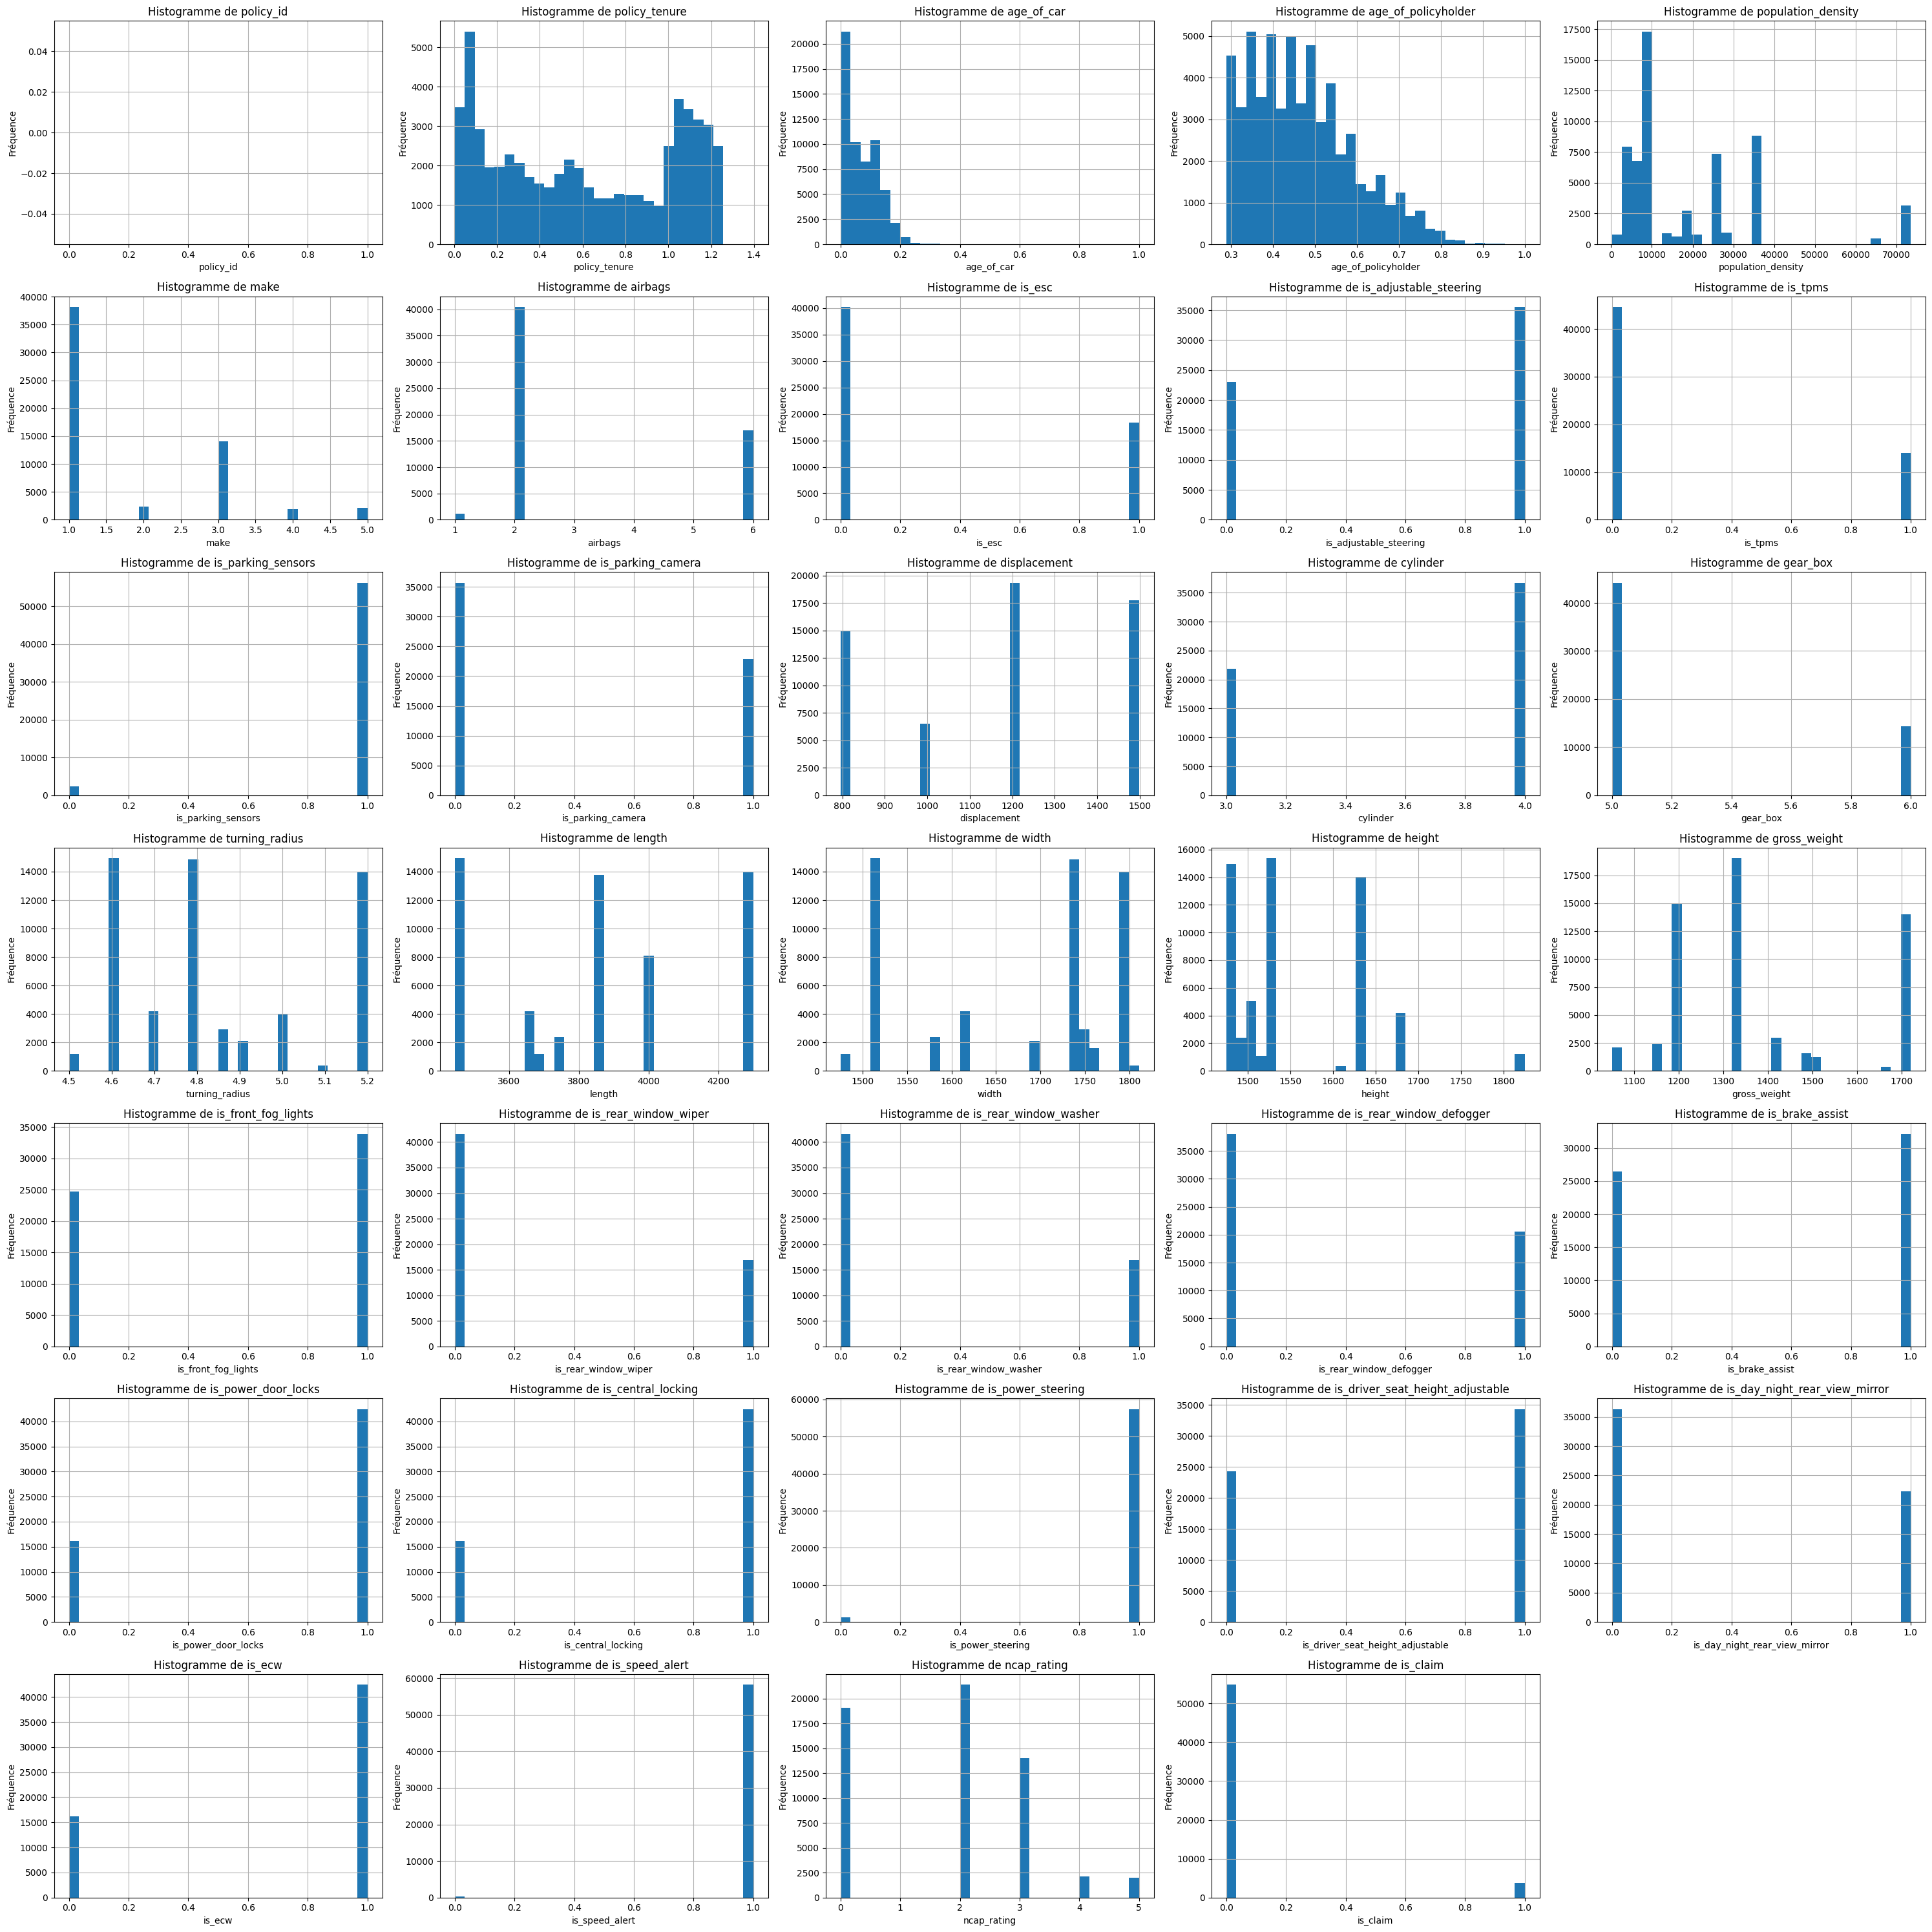

In [10]:
for i in range(0, len(numerical_df.columns), 5*7):
    plt.figure(figsize=(30, 30))
    for j in range(0, 5*7):
        if i + j < len(numerical_df.columns):
            plt.subplot(7, 5, j+1)
            numerical_df[numerical_df.columns[i+j]].hist(bins=30)
            plt.title(f'Histogramme de {numerical_df.columns[i+j]}')
            plt.xlabel(numerical_df.columns[i+j])
            plt.ylabel('Fréquence')
    plt.tight_layout()
    plt.show() 

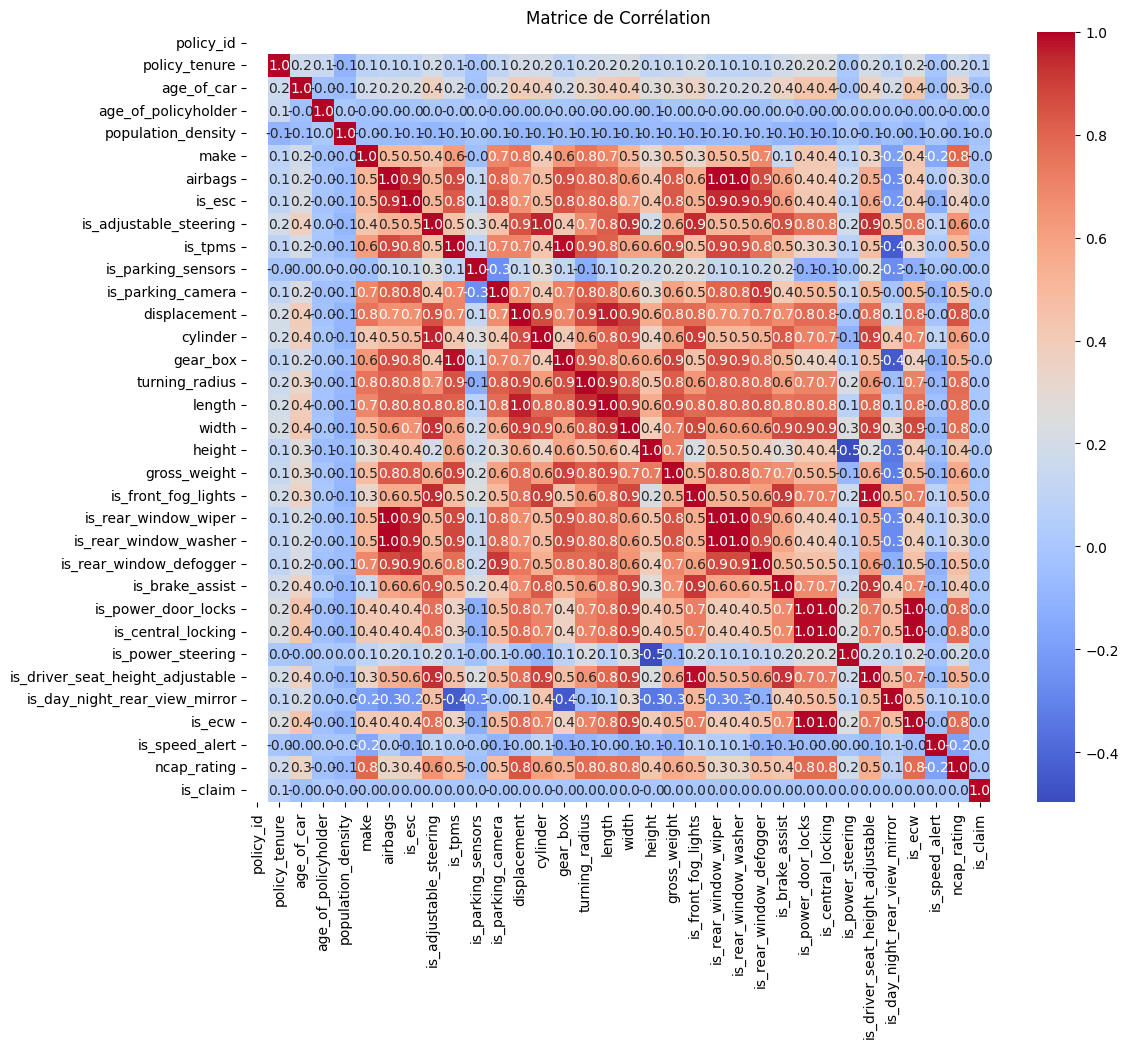

In [11]:
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

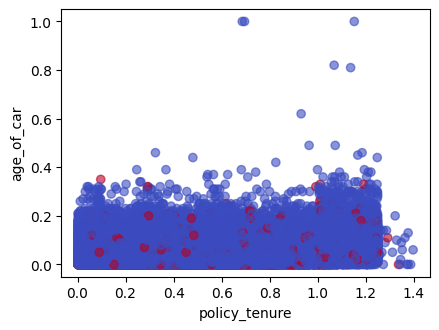

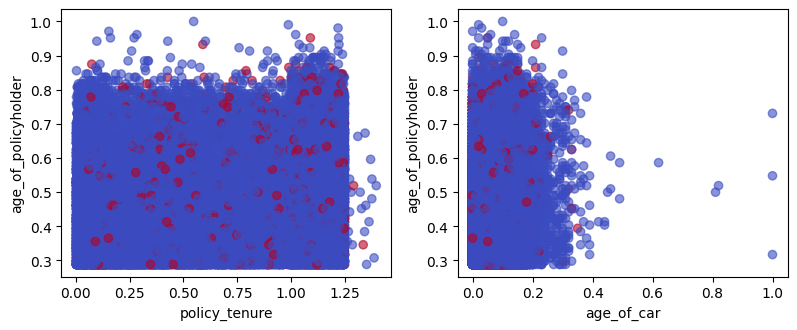

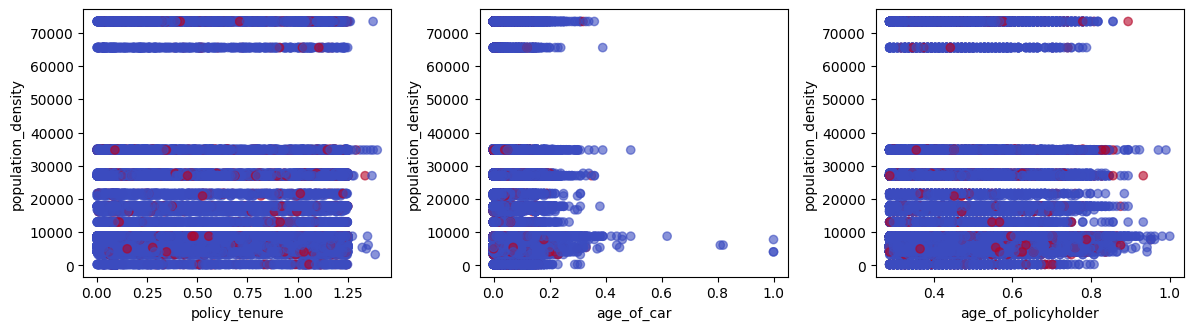

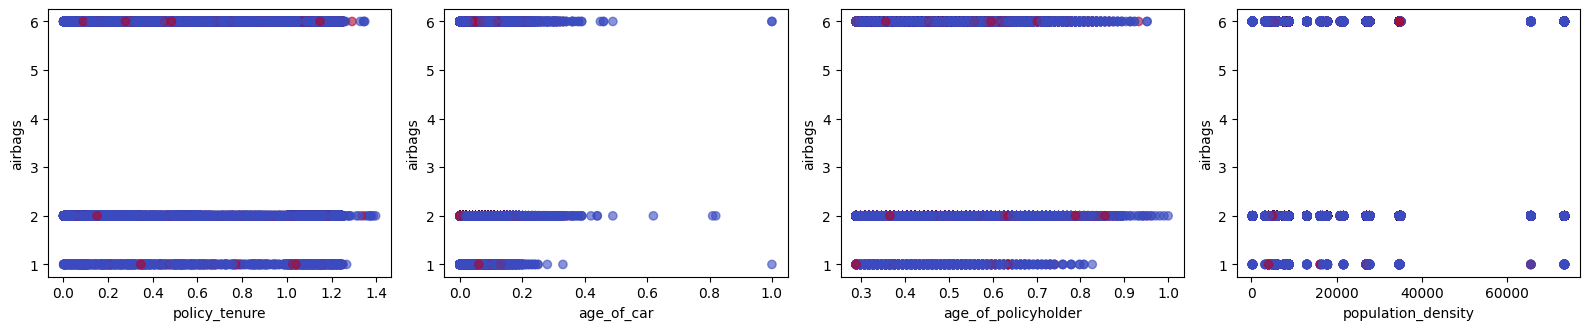

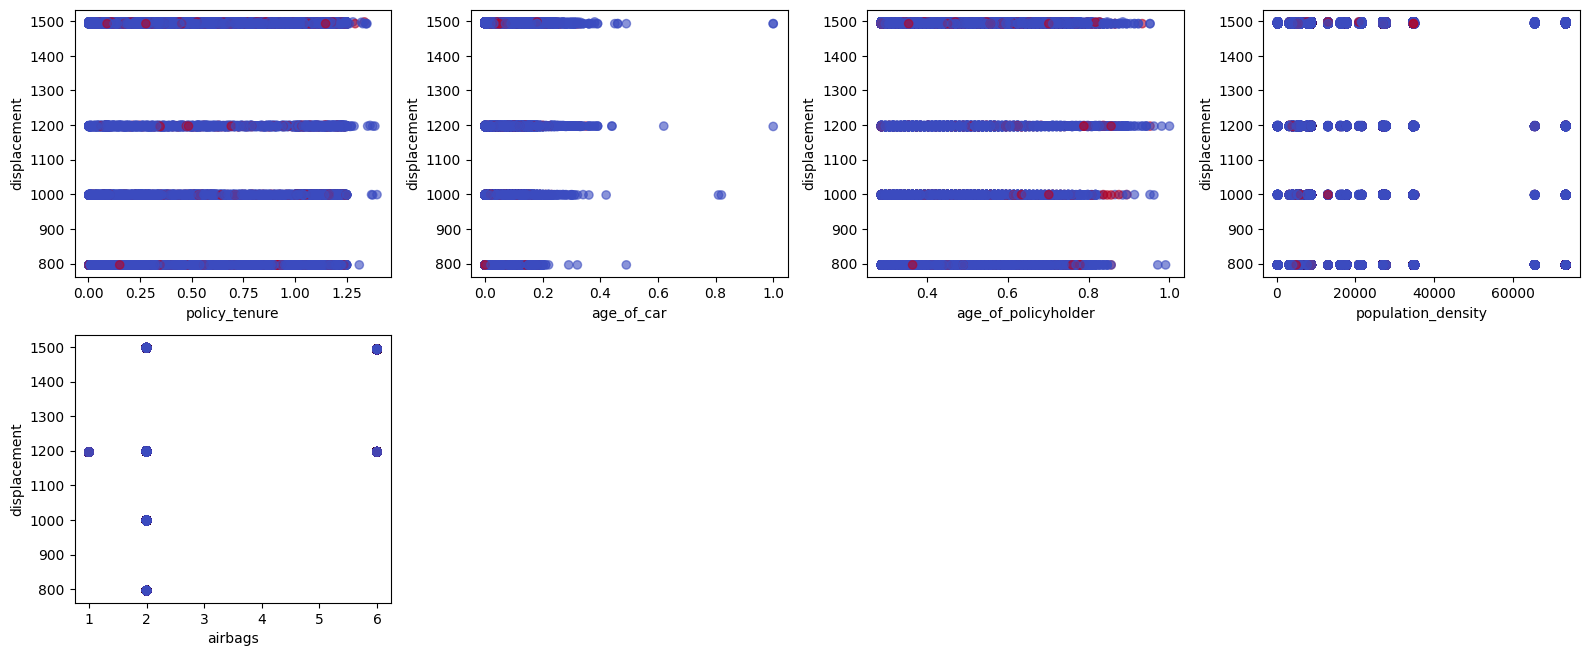

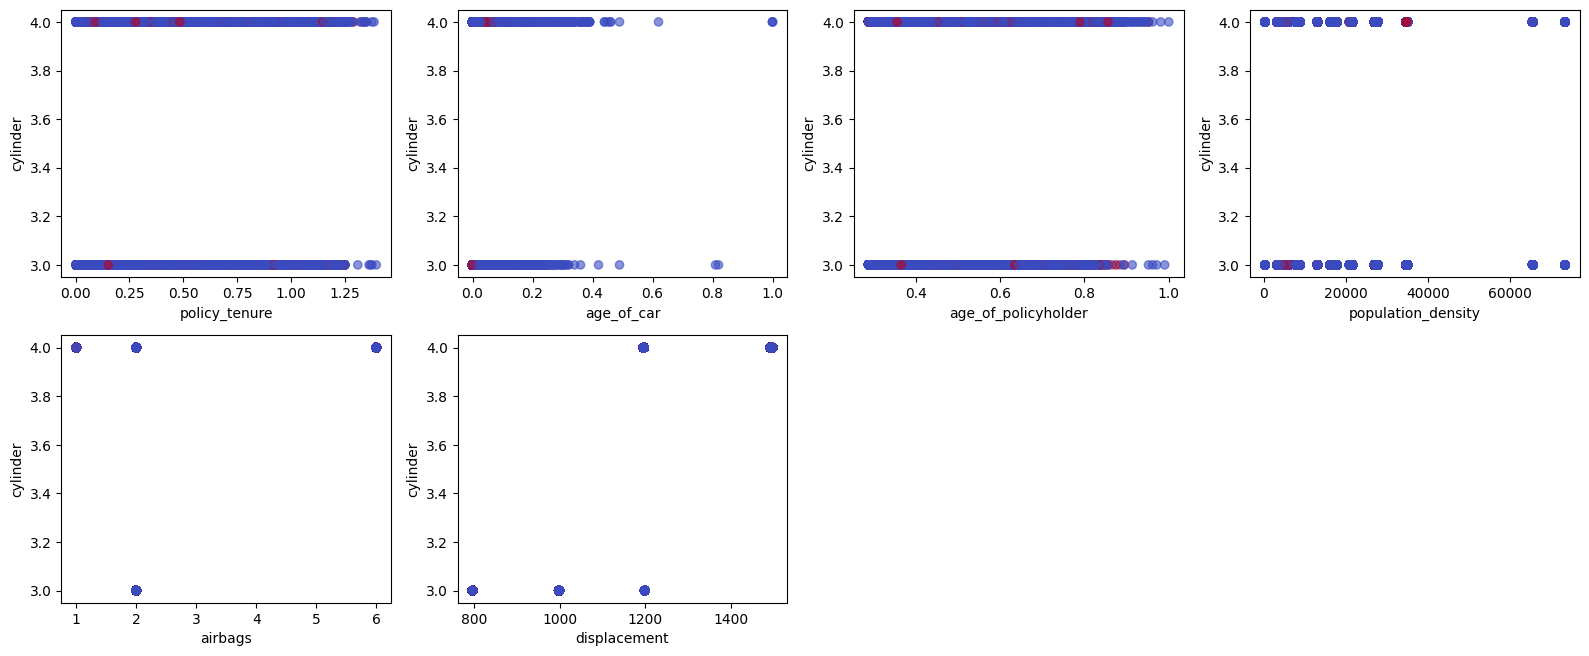

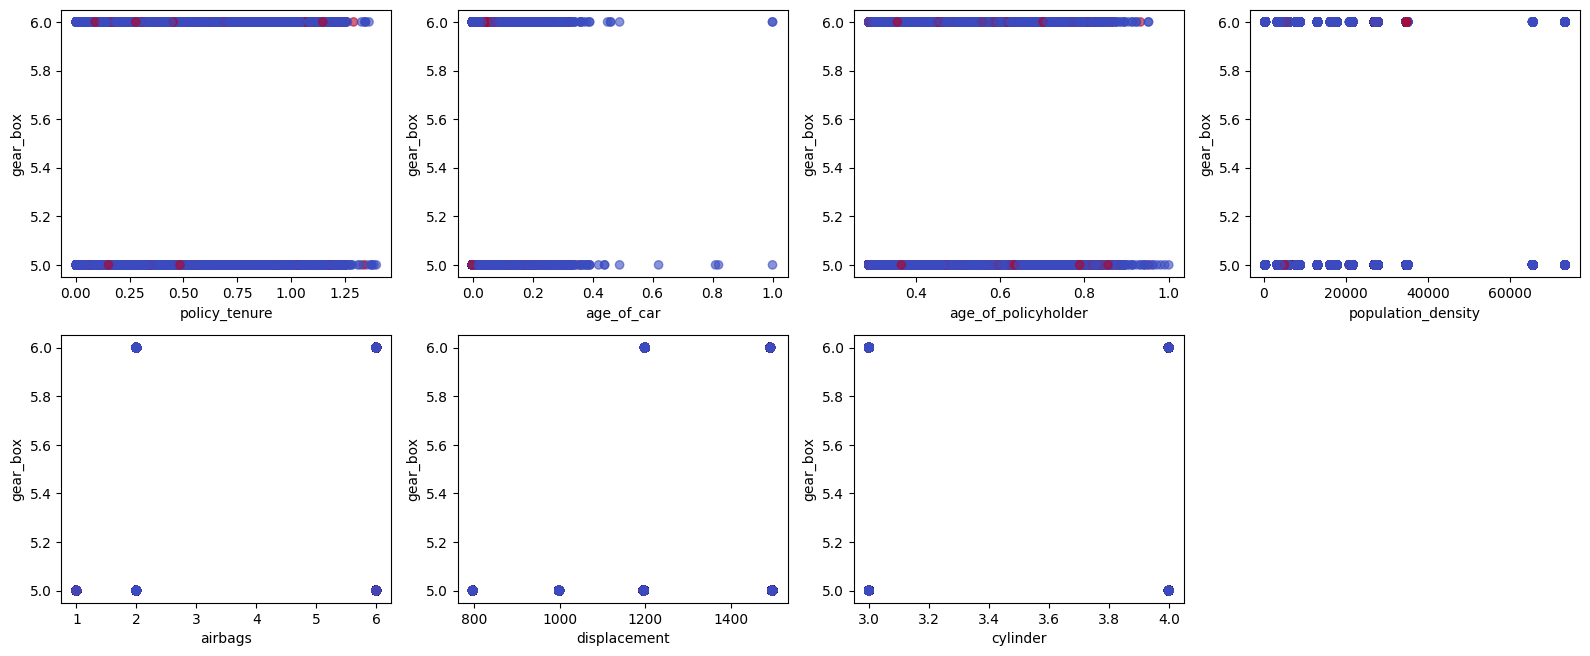

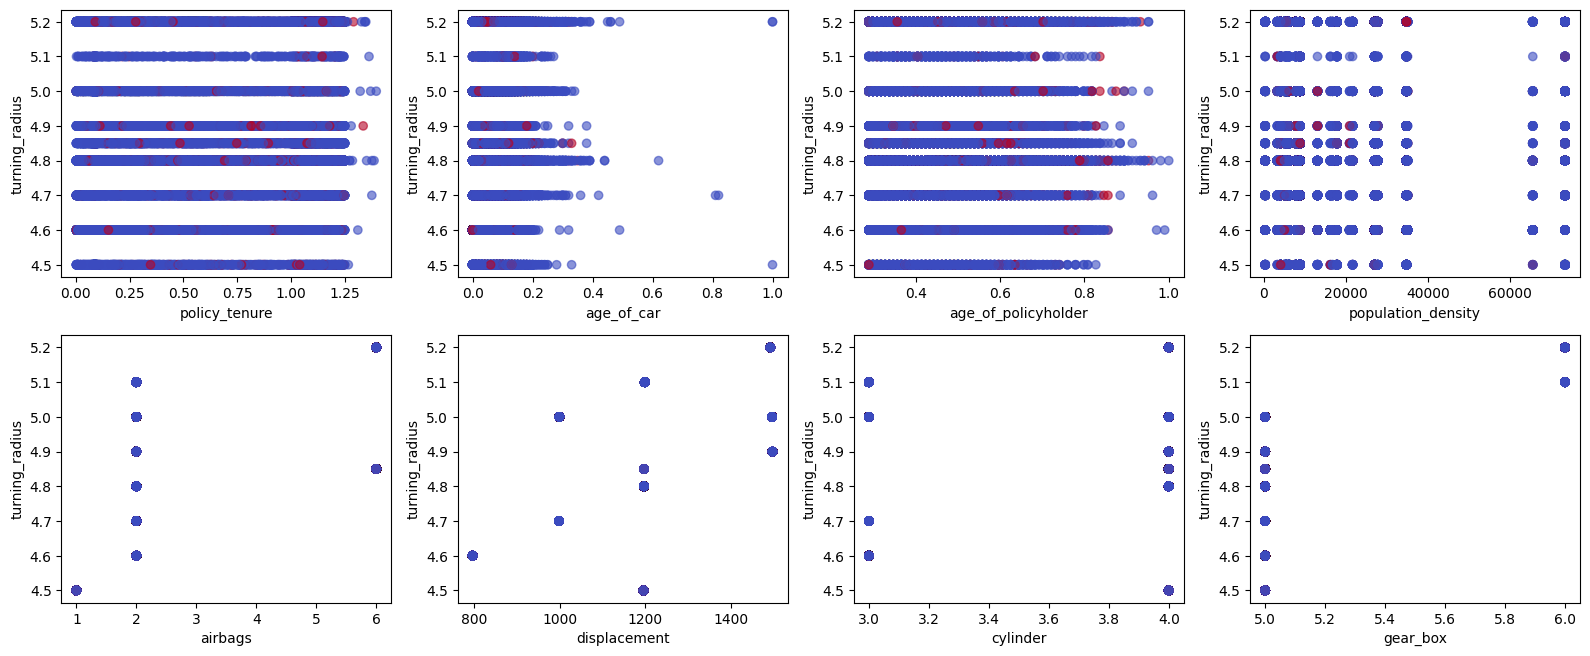

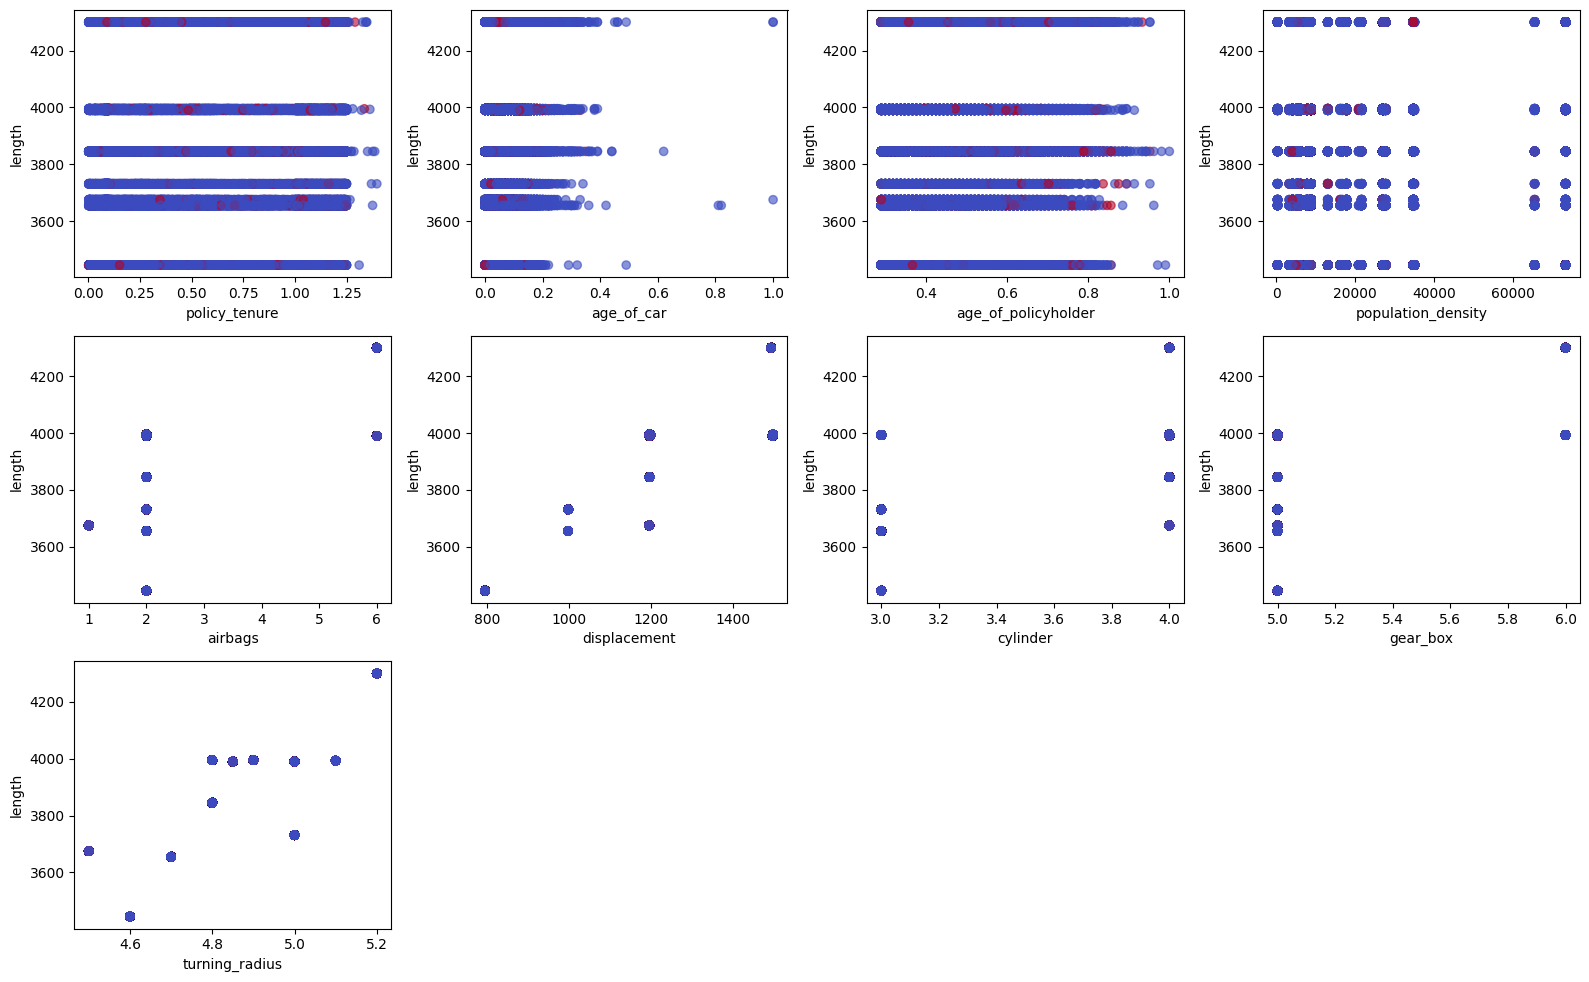

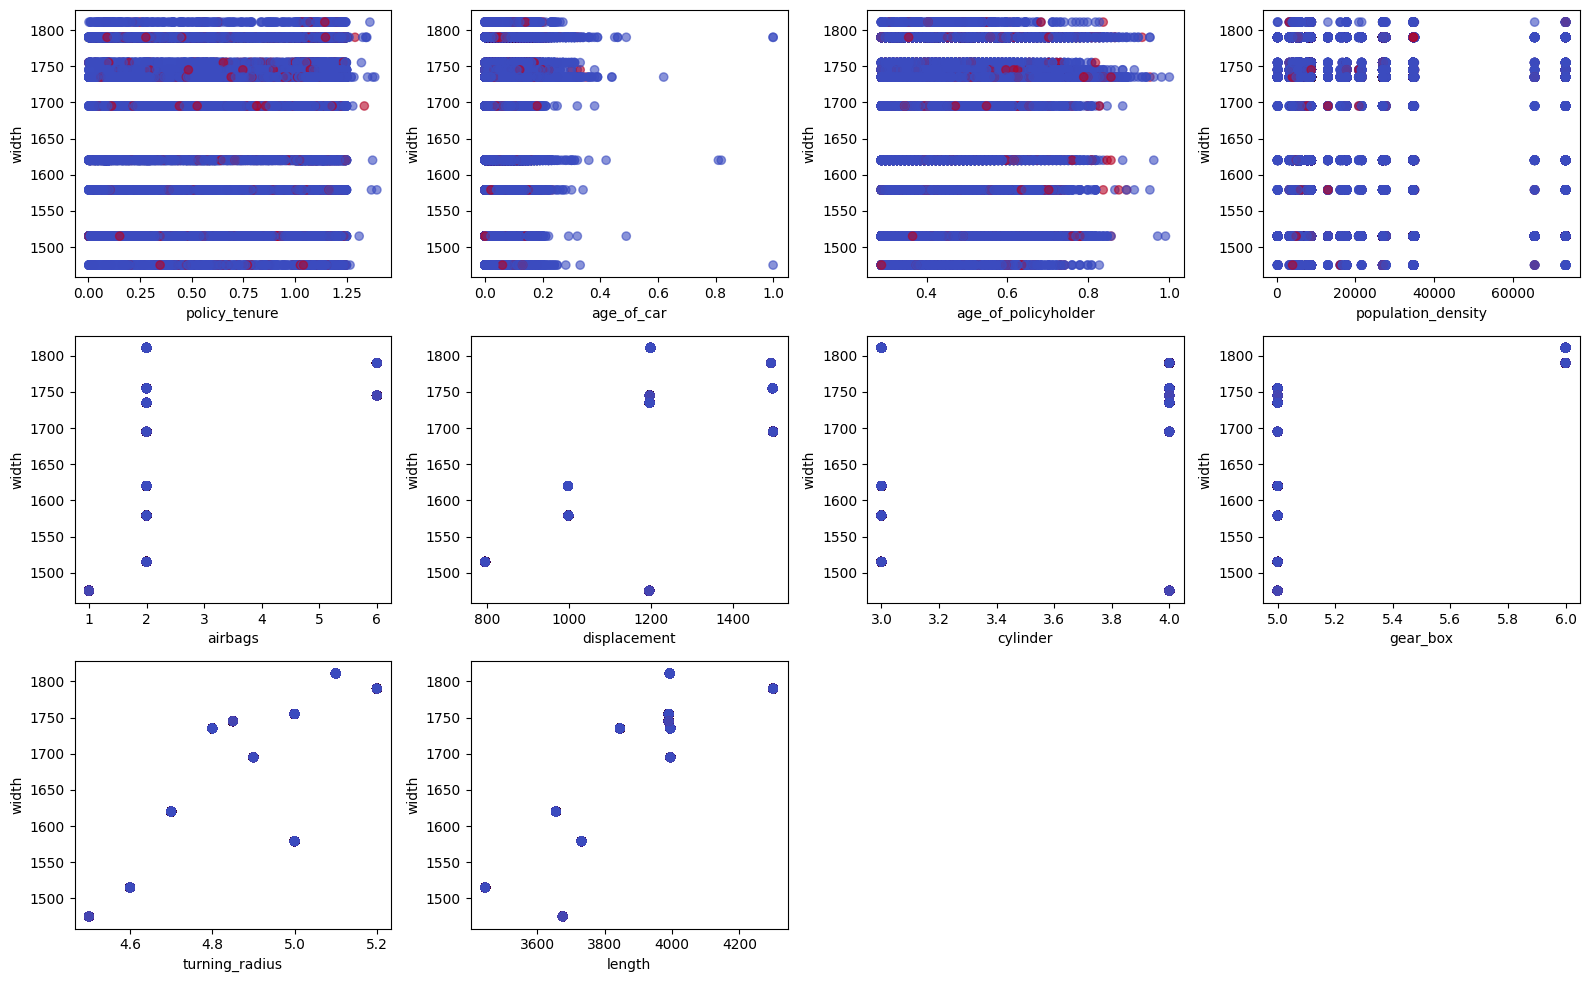

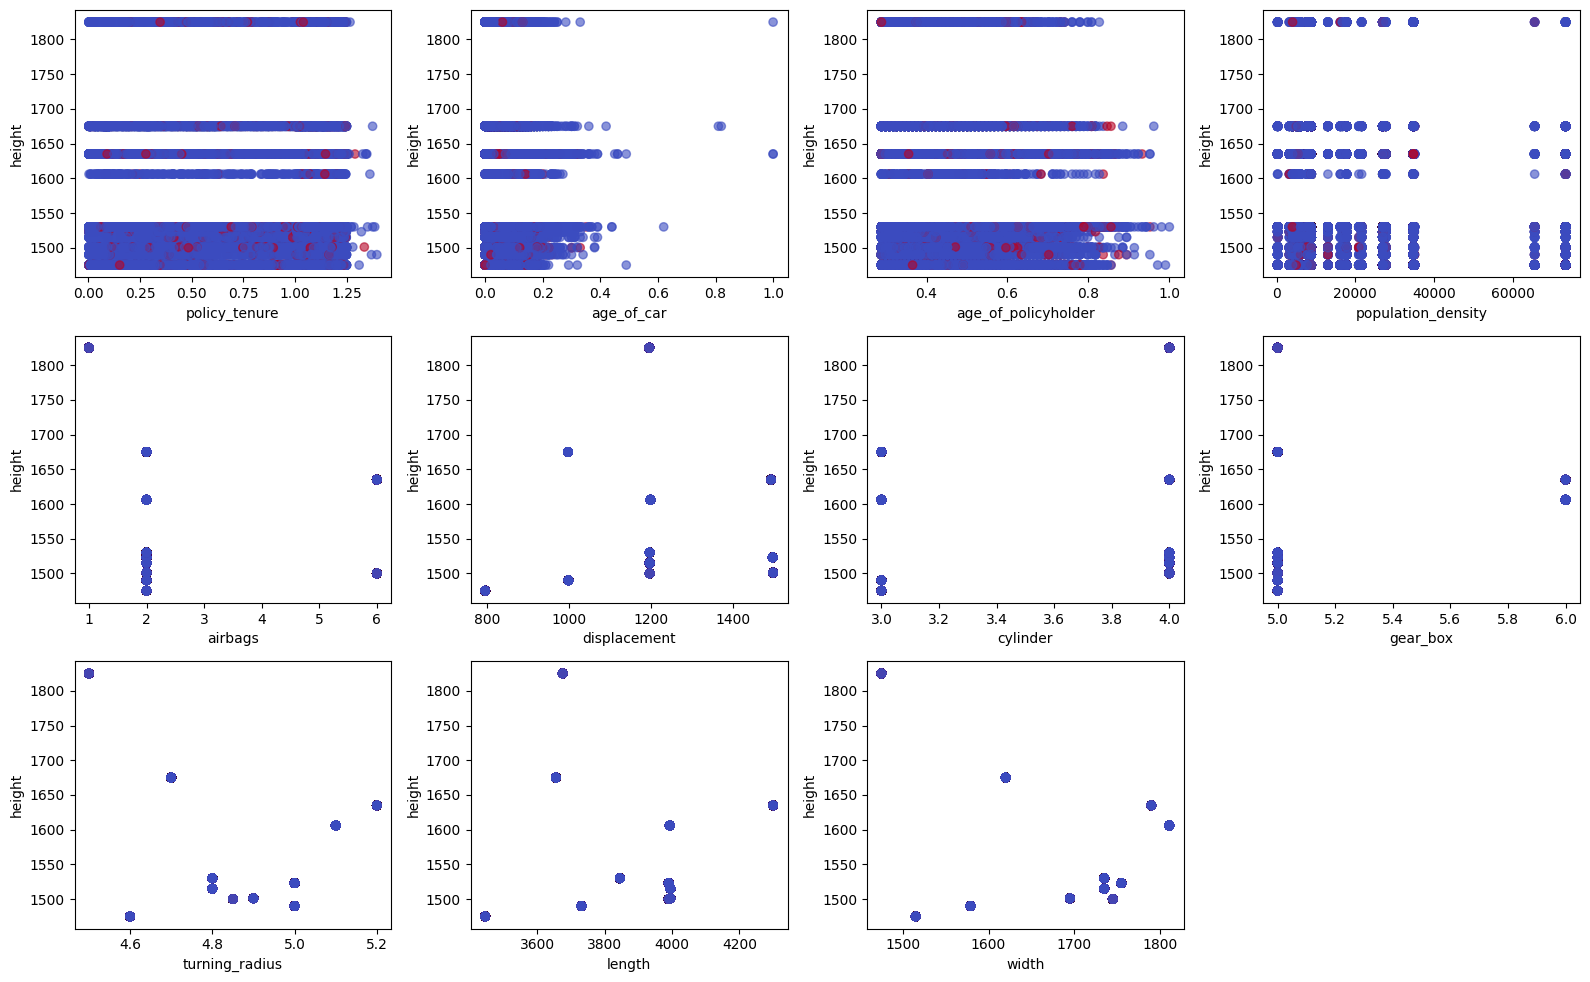

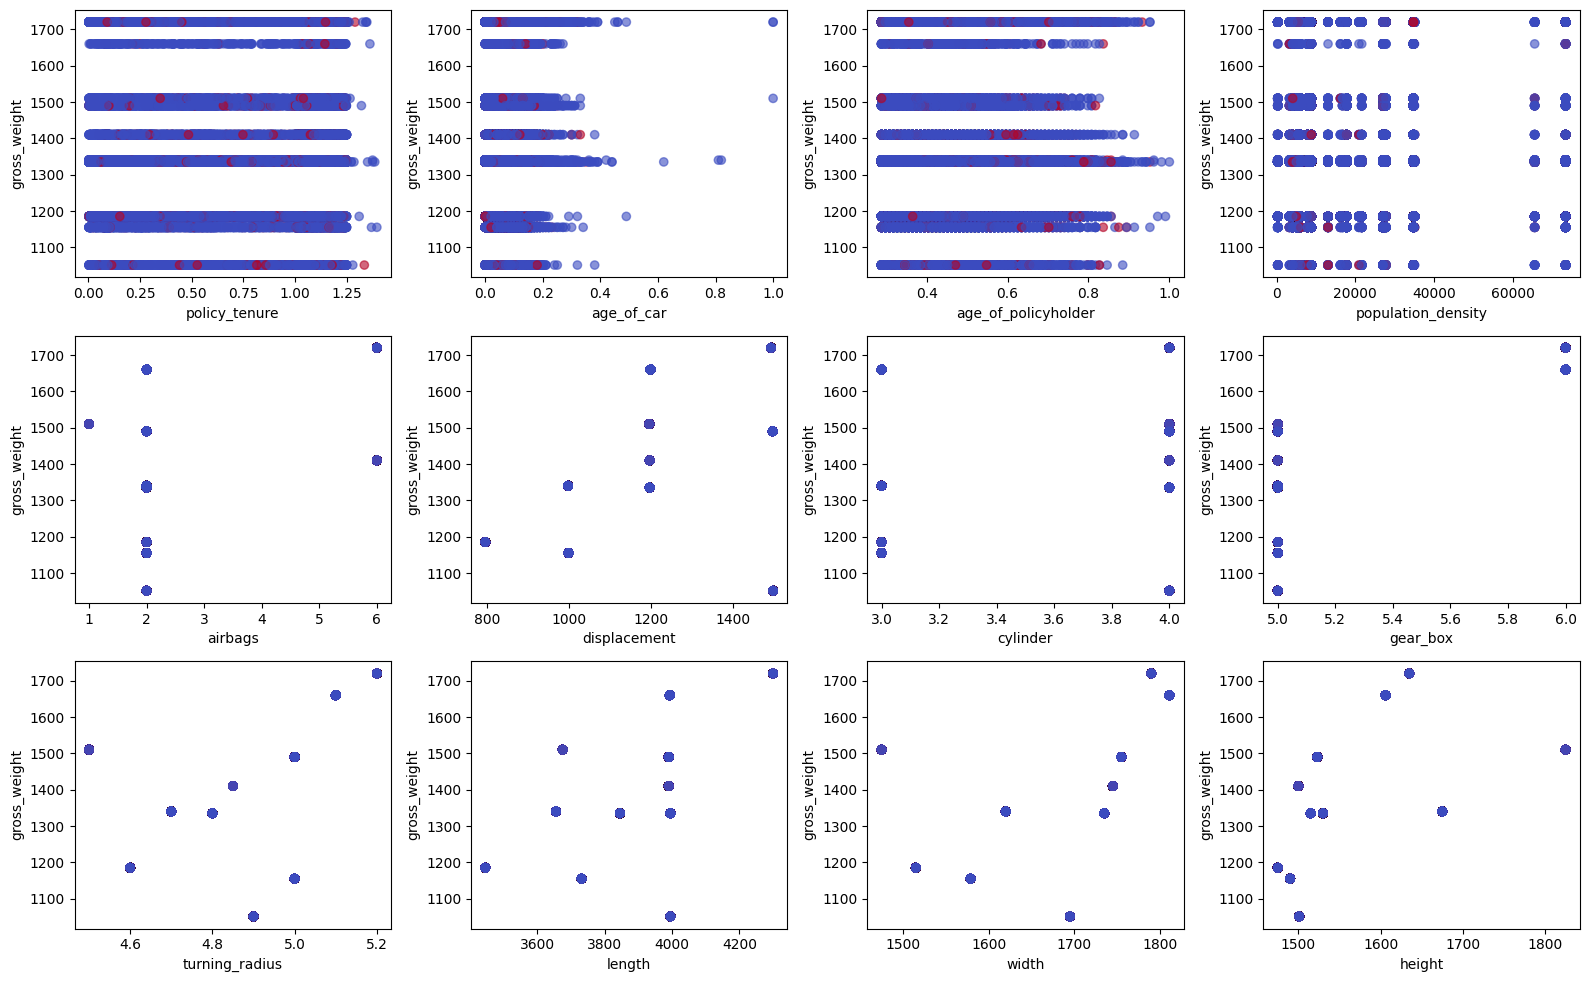

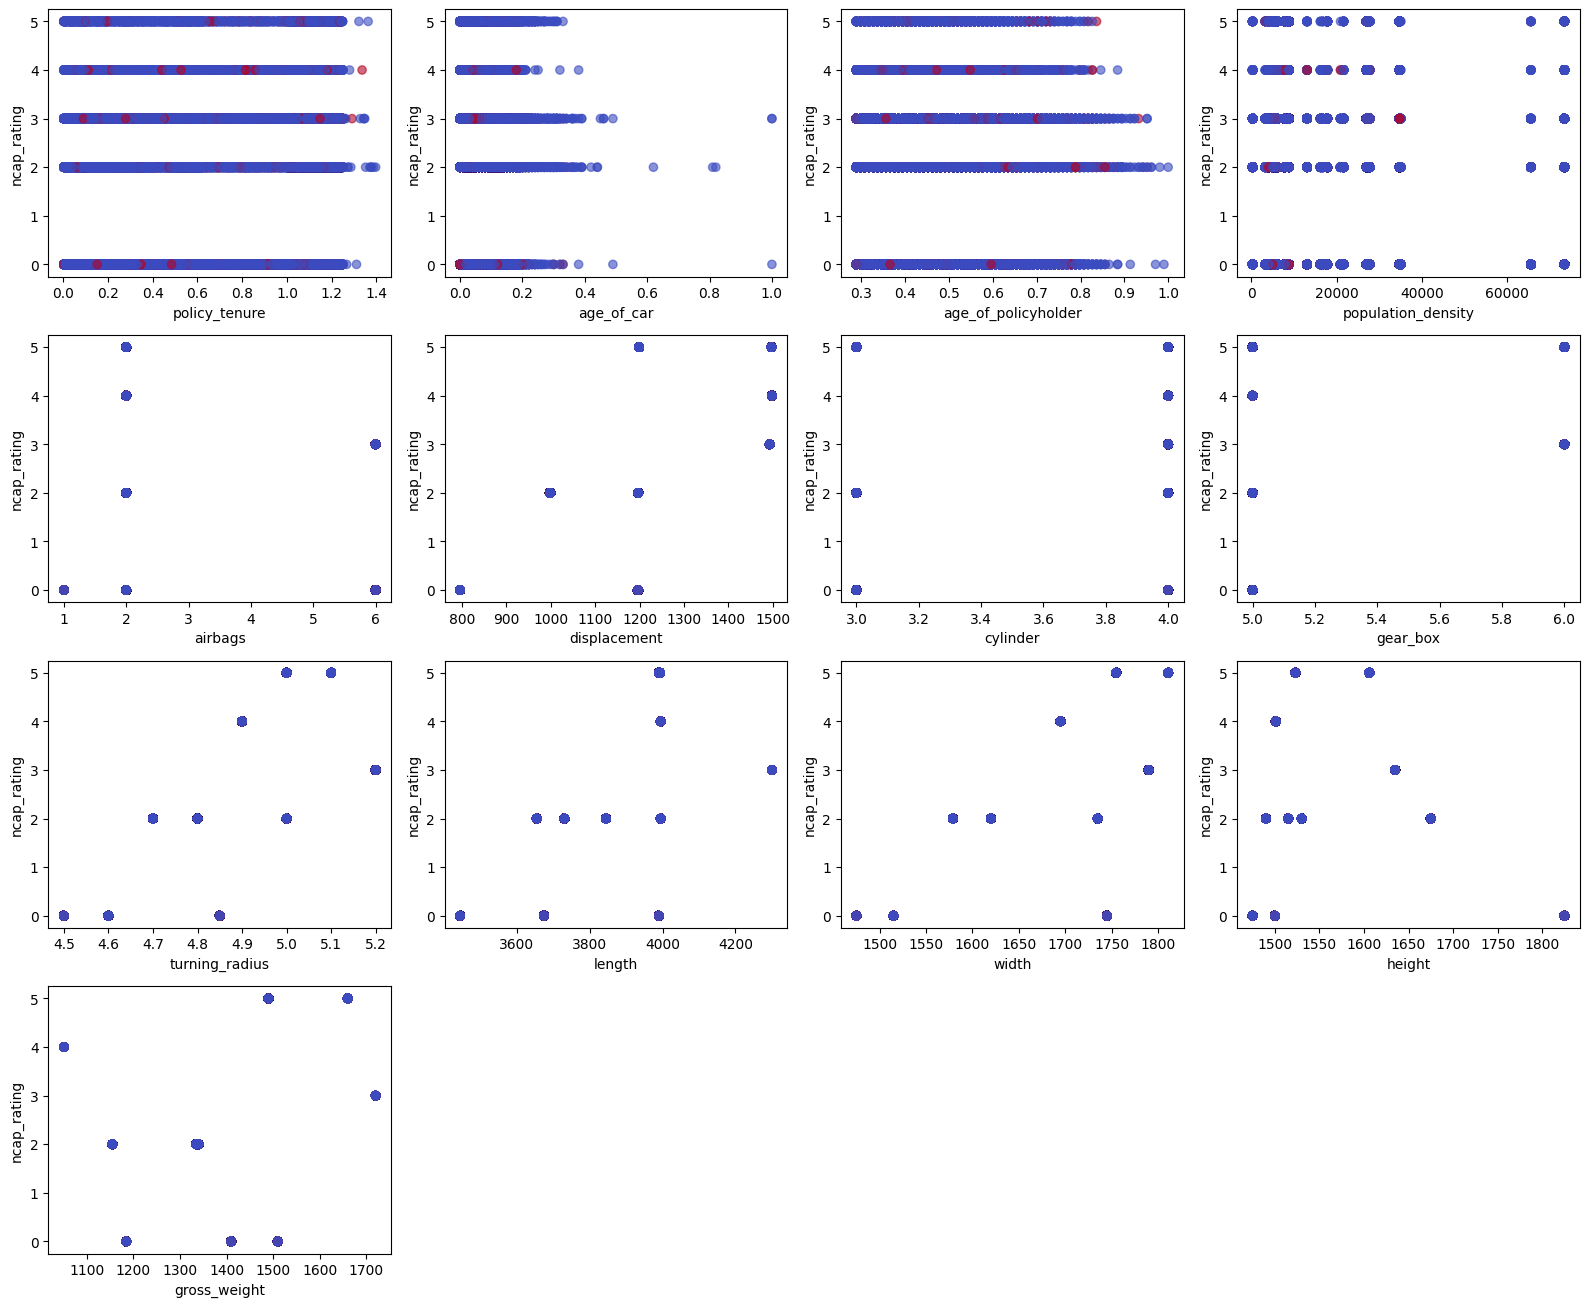

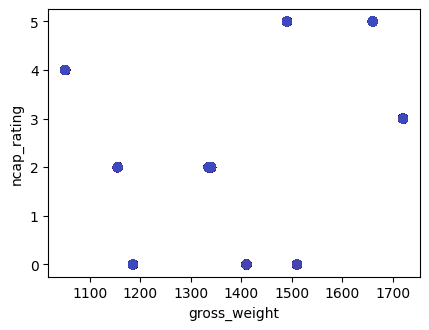

In [12]:
cols = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density',
                     'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius',
                     'length', 'width', 'height', 'gross_weight', 'ncap_rating']

for i in range(0, len(cols)):
    for j in range(0, len(numerical_df.columns), 3*4):
        if j < i:
            plt.figure(figsize=(16, 16))
            for k in range(0, 5*4):
                if j + k < i:
                    plt.subplot(5, 4, k+1)
                    plt.scatter(numerical_df[cols[j+k]], numerical_df[cols[i]], c=numerical_df['is_claim'], cmap='coolwarm', alpha=0.6)
                    plt.xlabel(numerical_columns[j+k])
                    plt.ylabel(numerical_columns[i])
            plt.tight_layout()
            plt.show()


0.06396777717094485


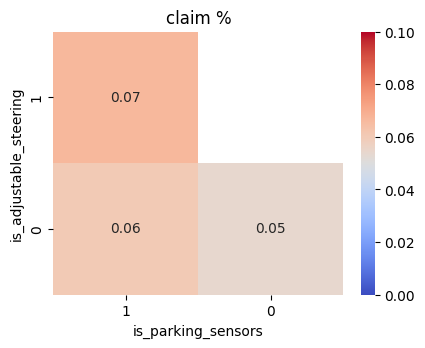

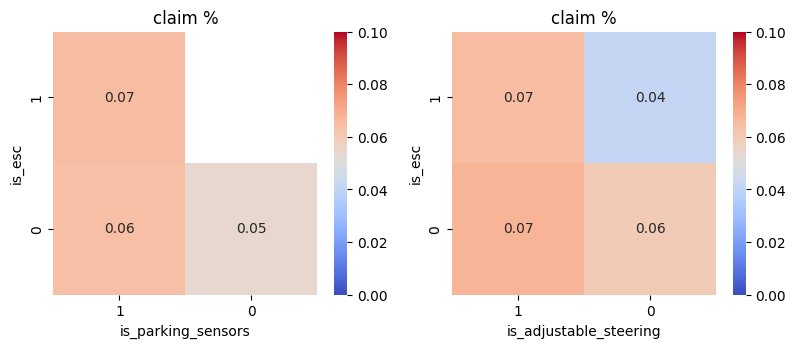

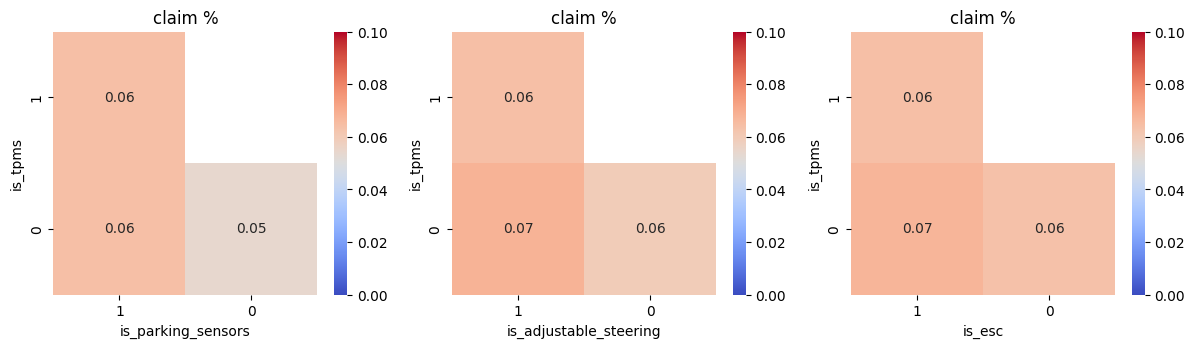

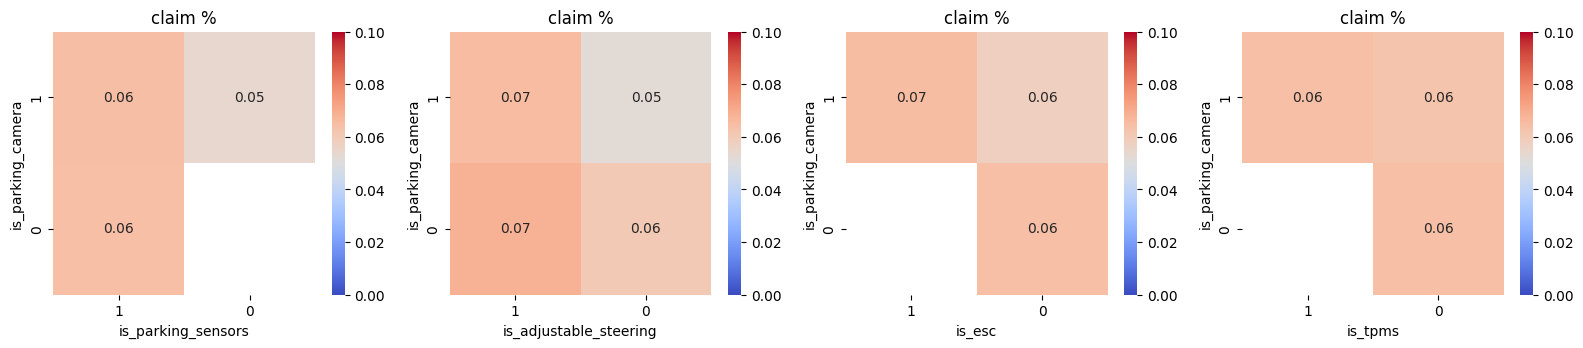

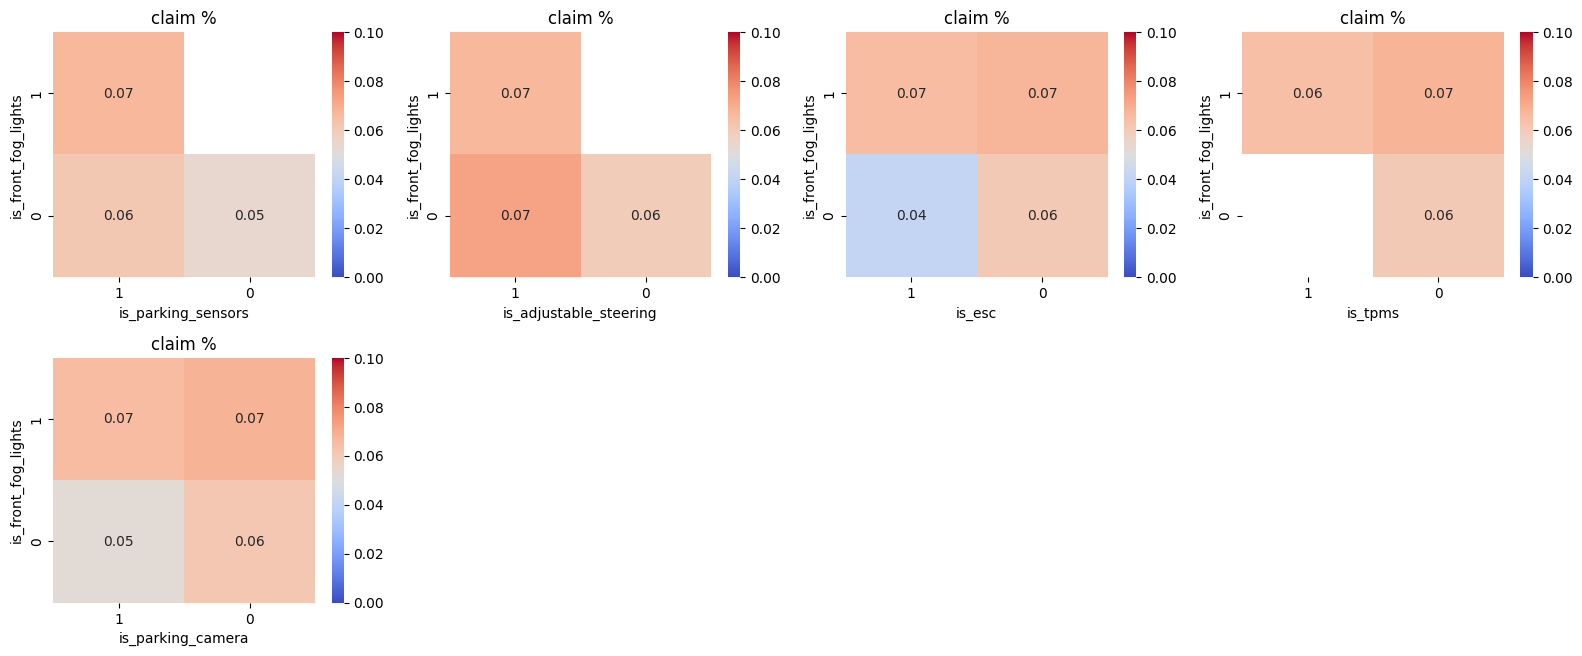

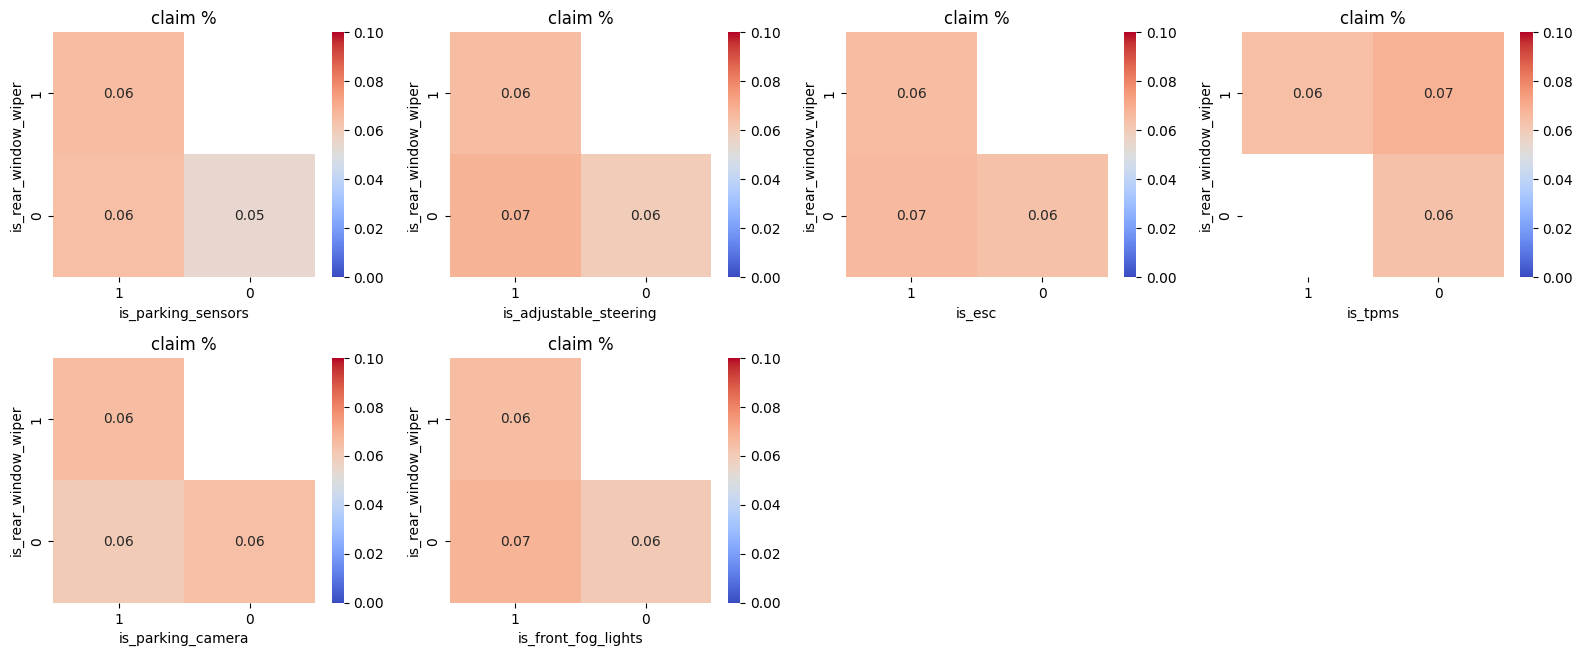

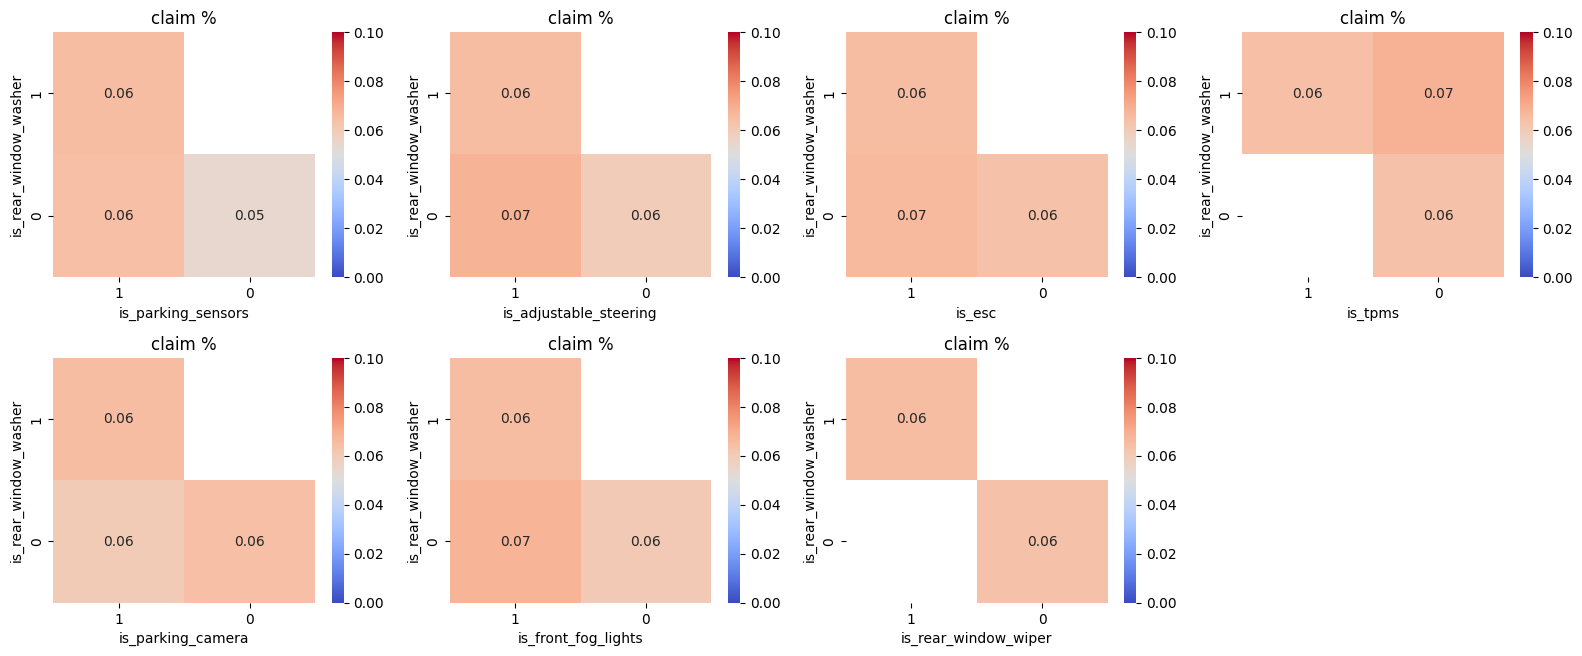

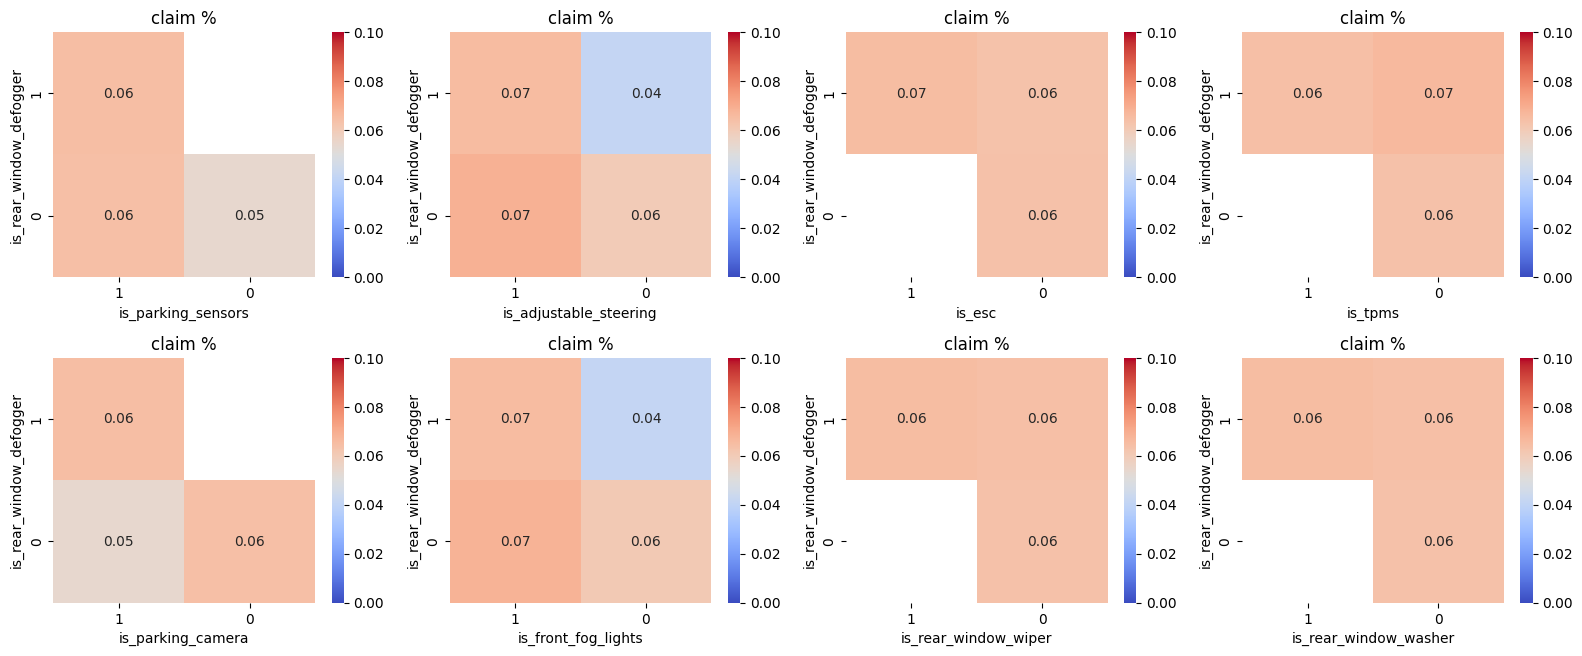

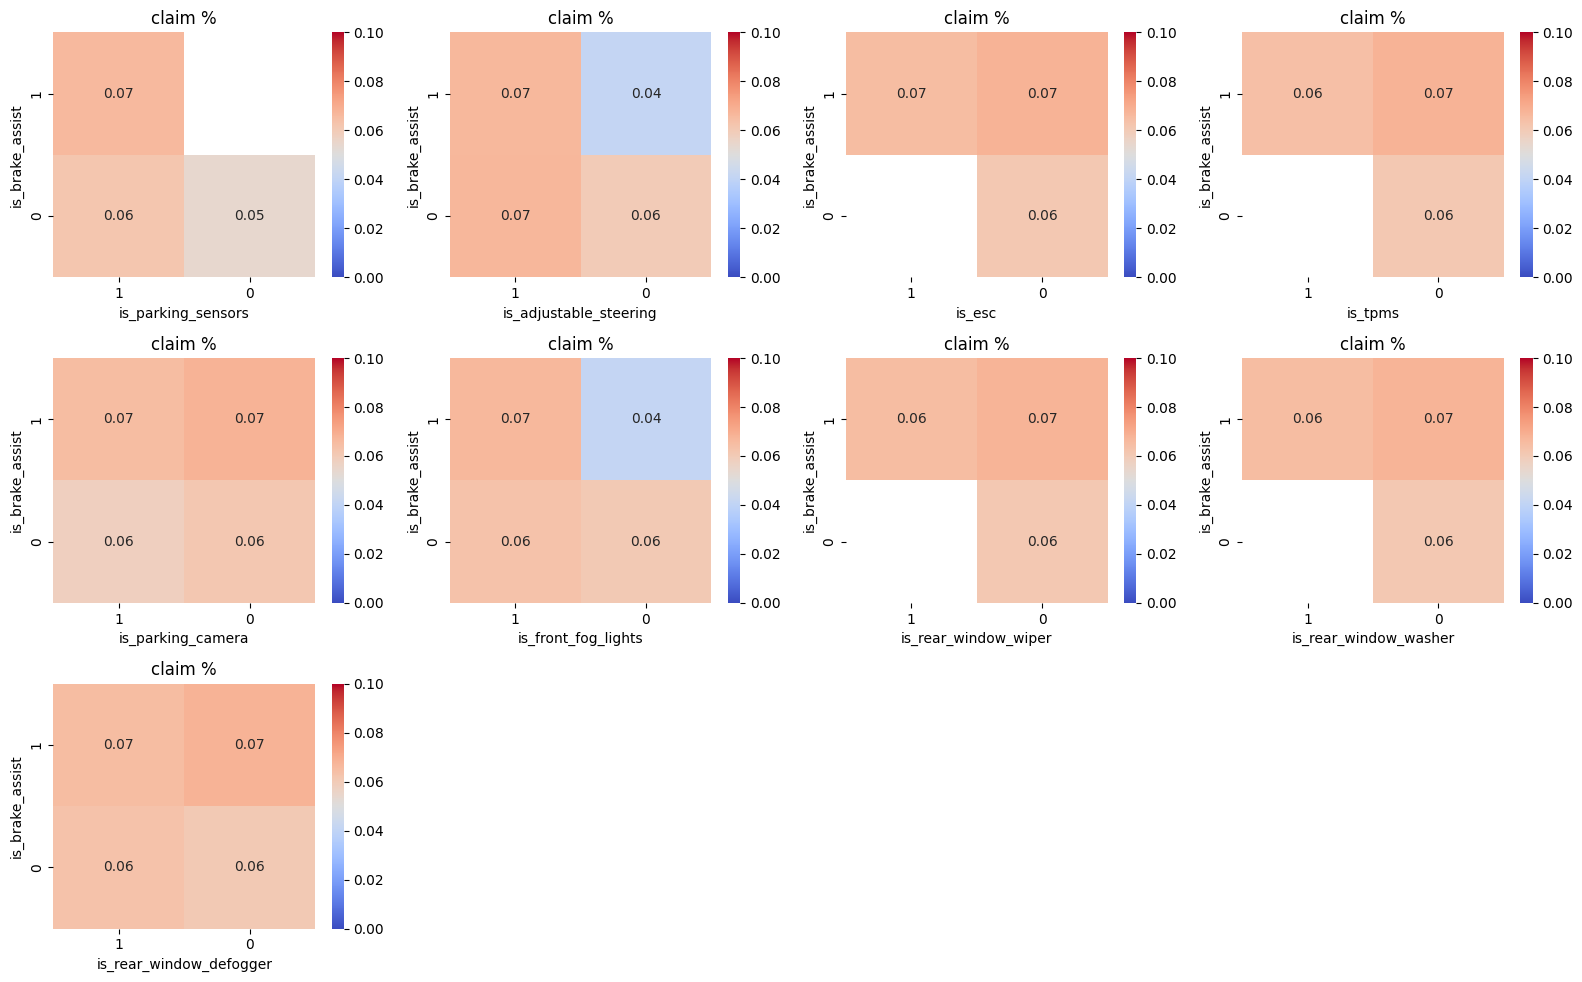

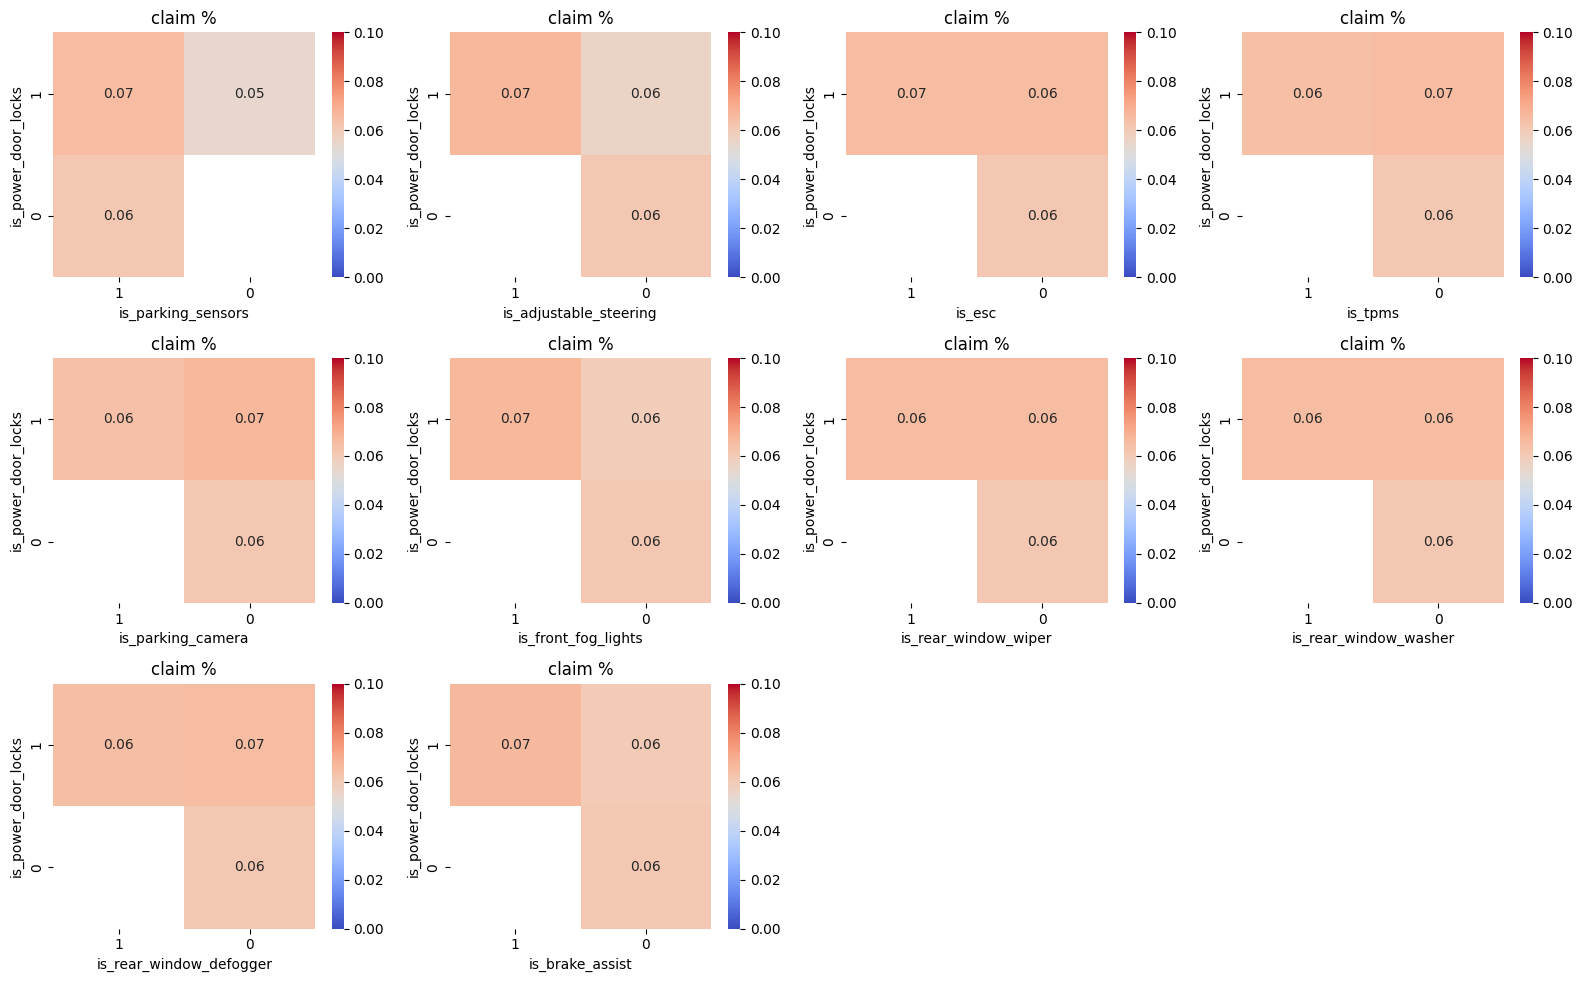

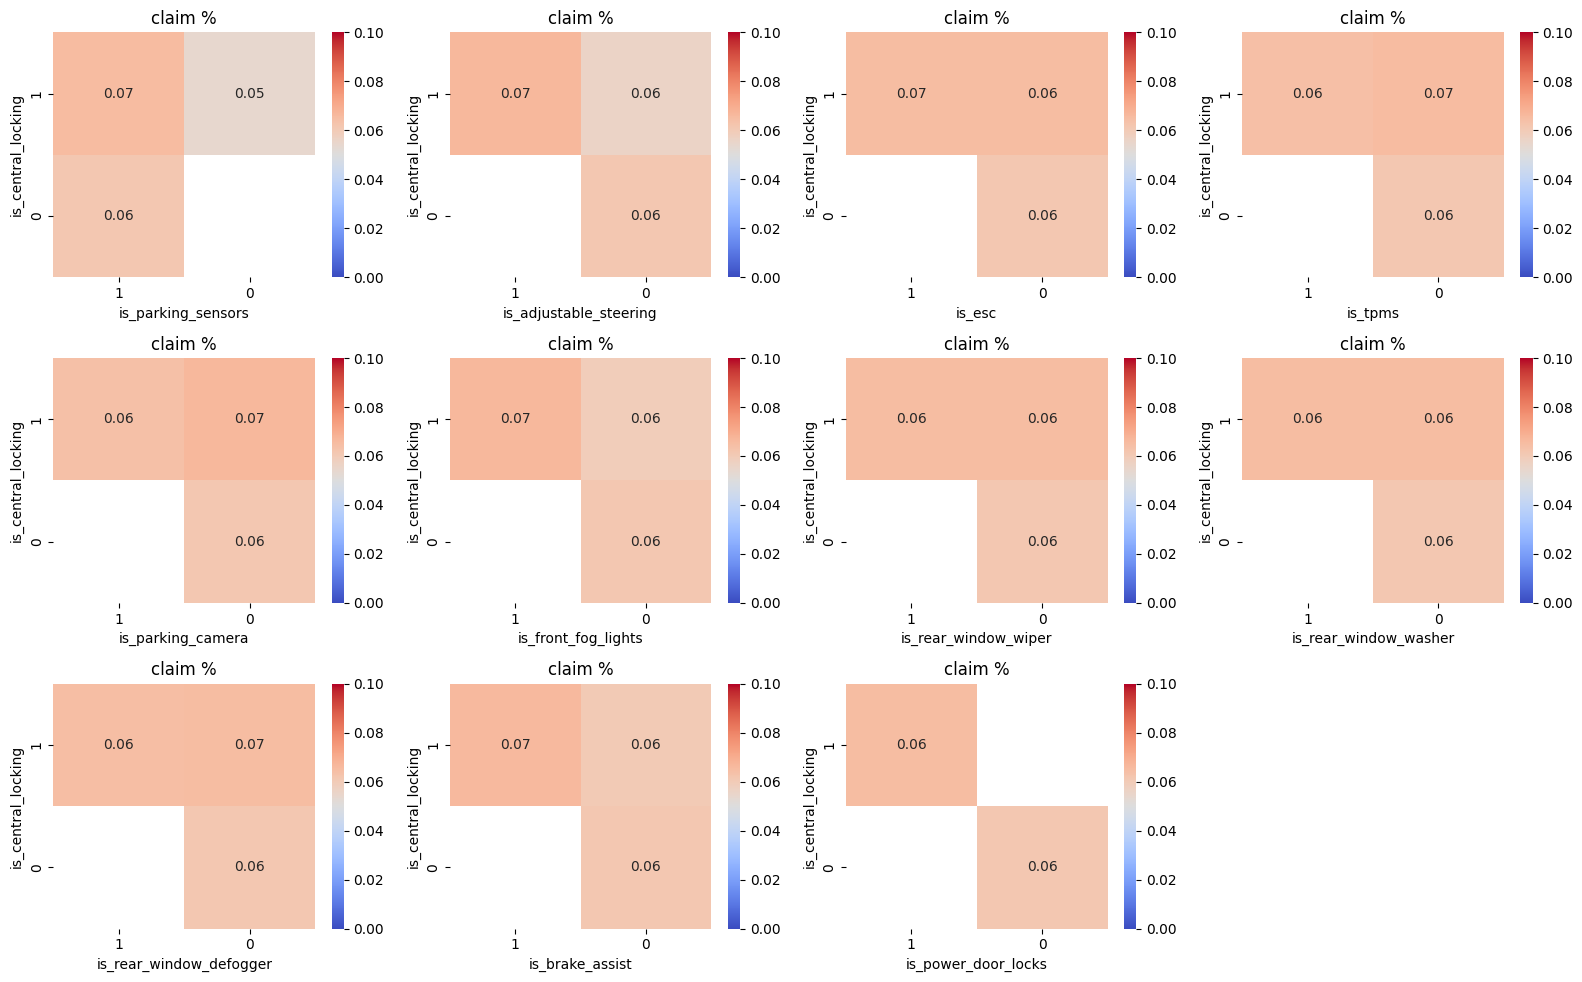

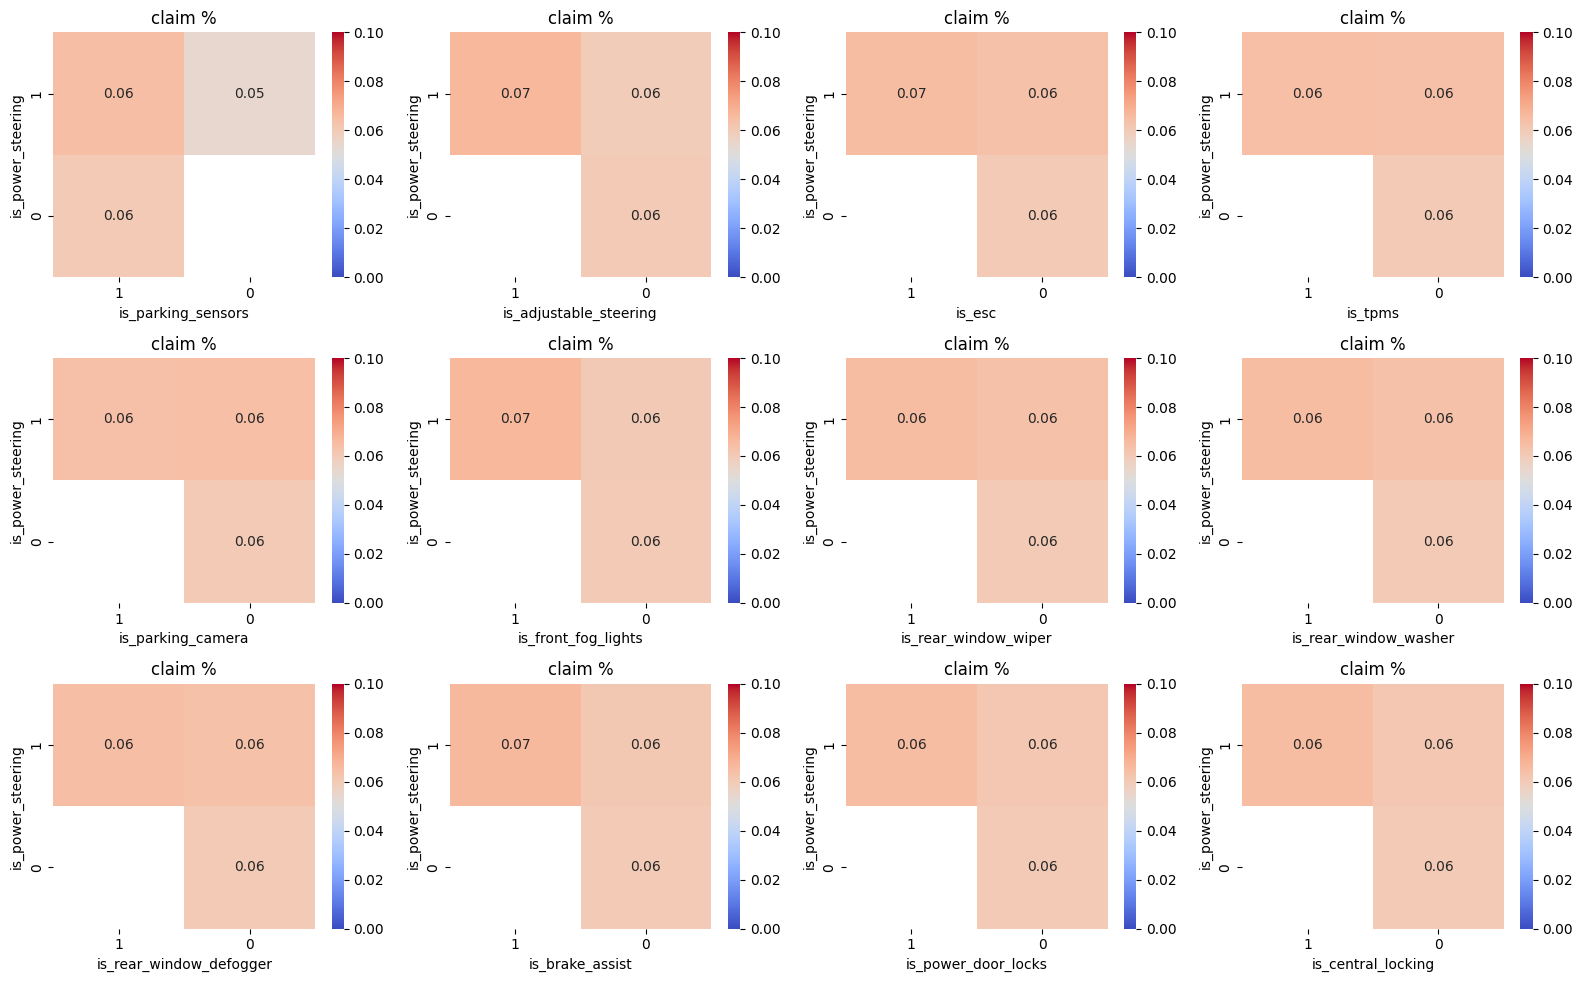

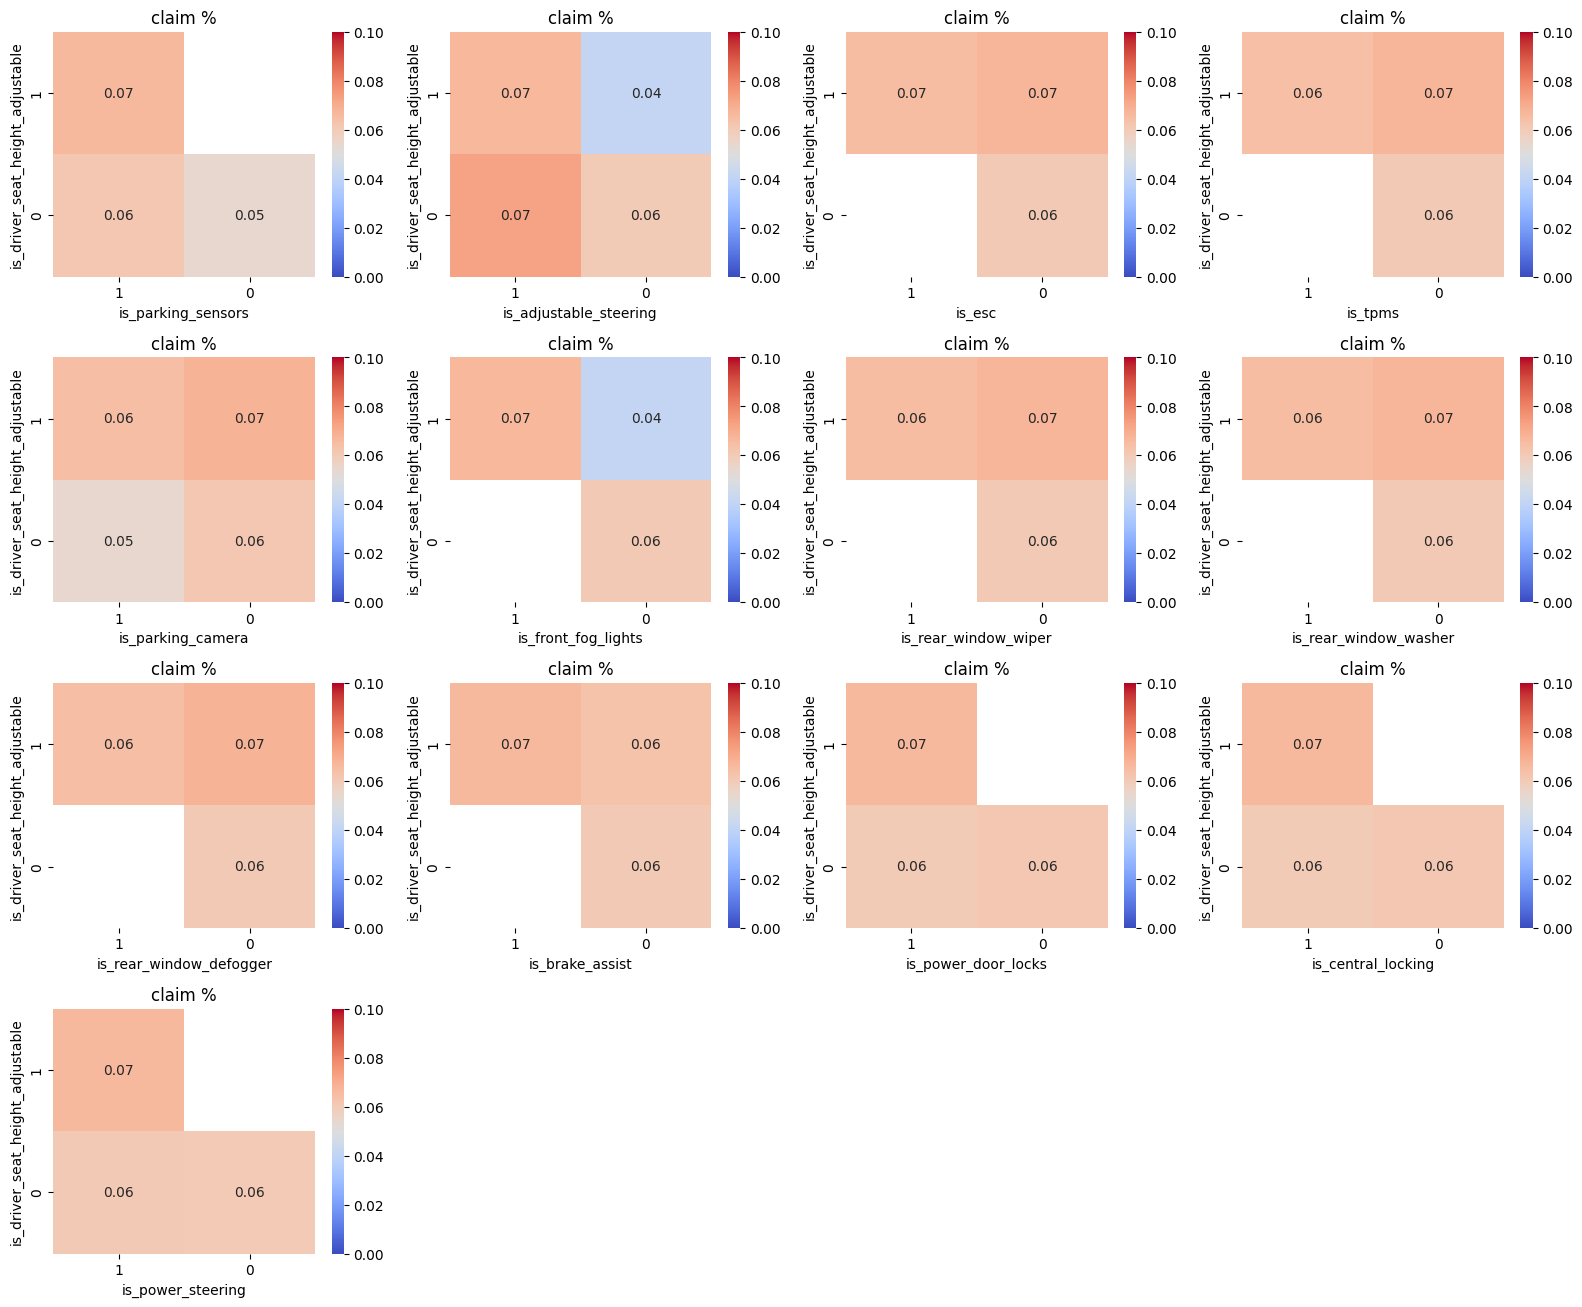

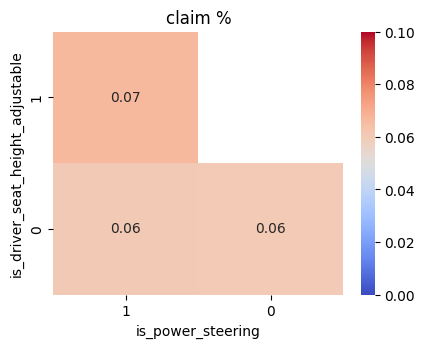

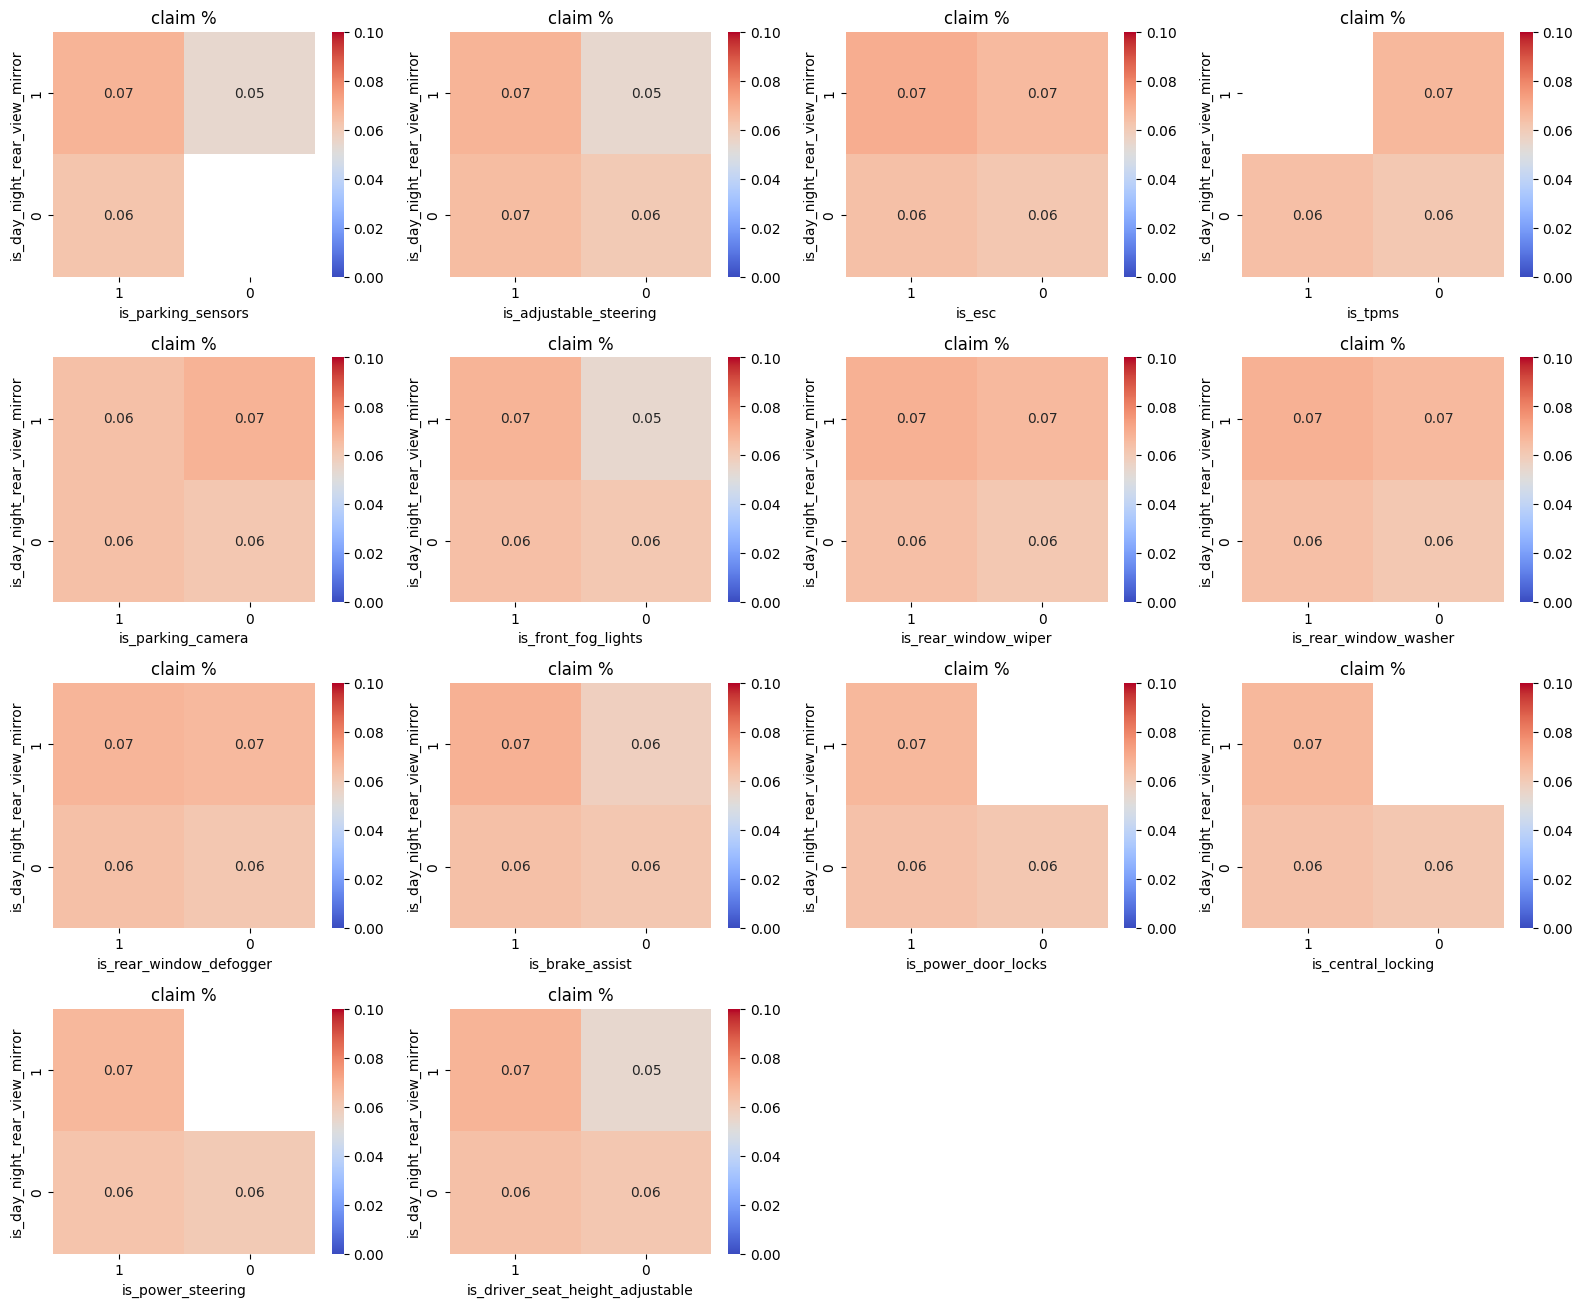

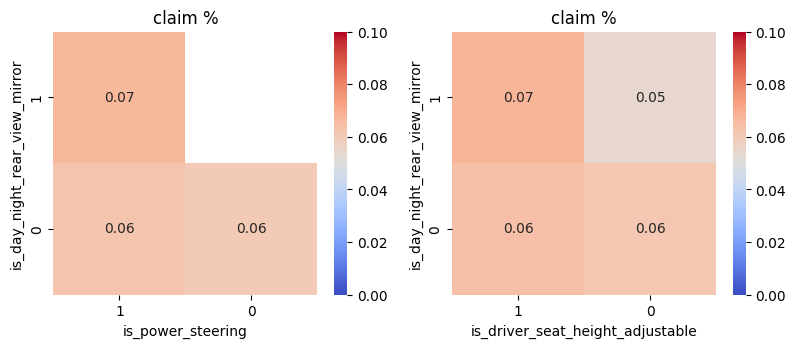

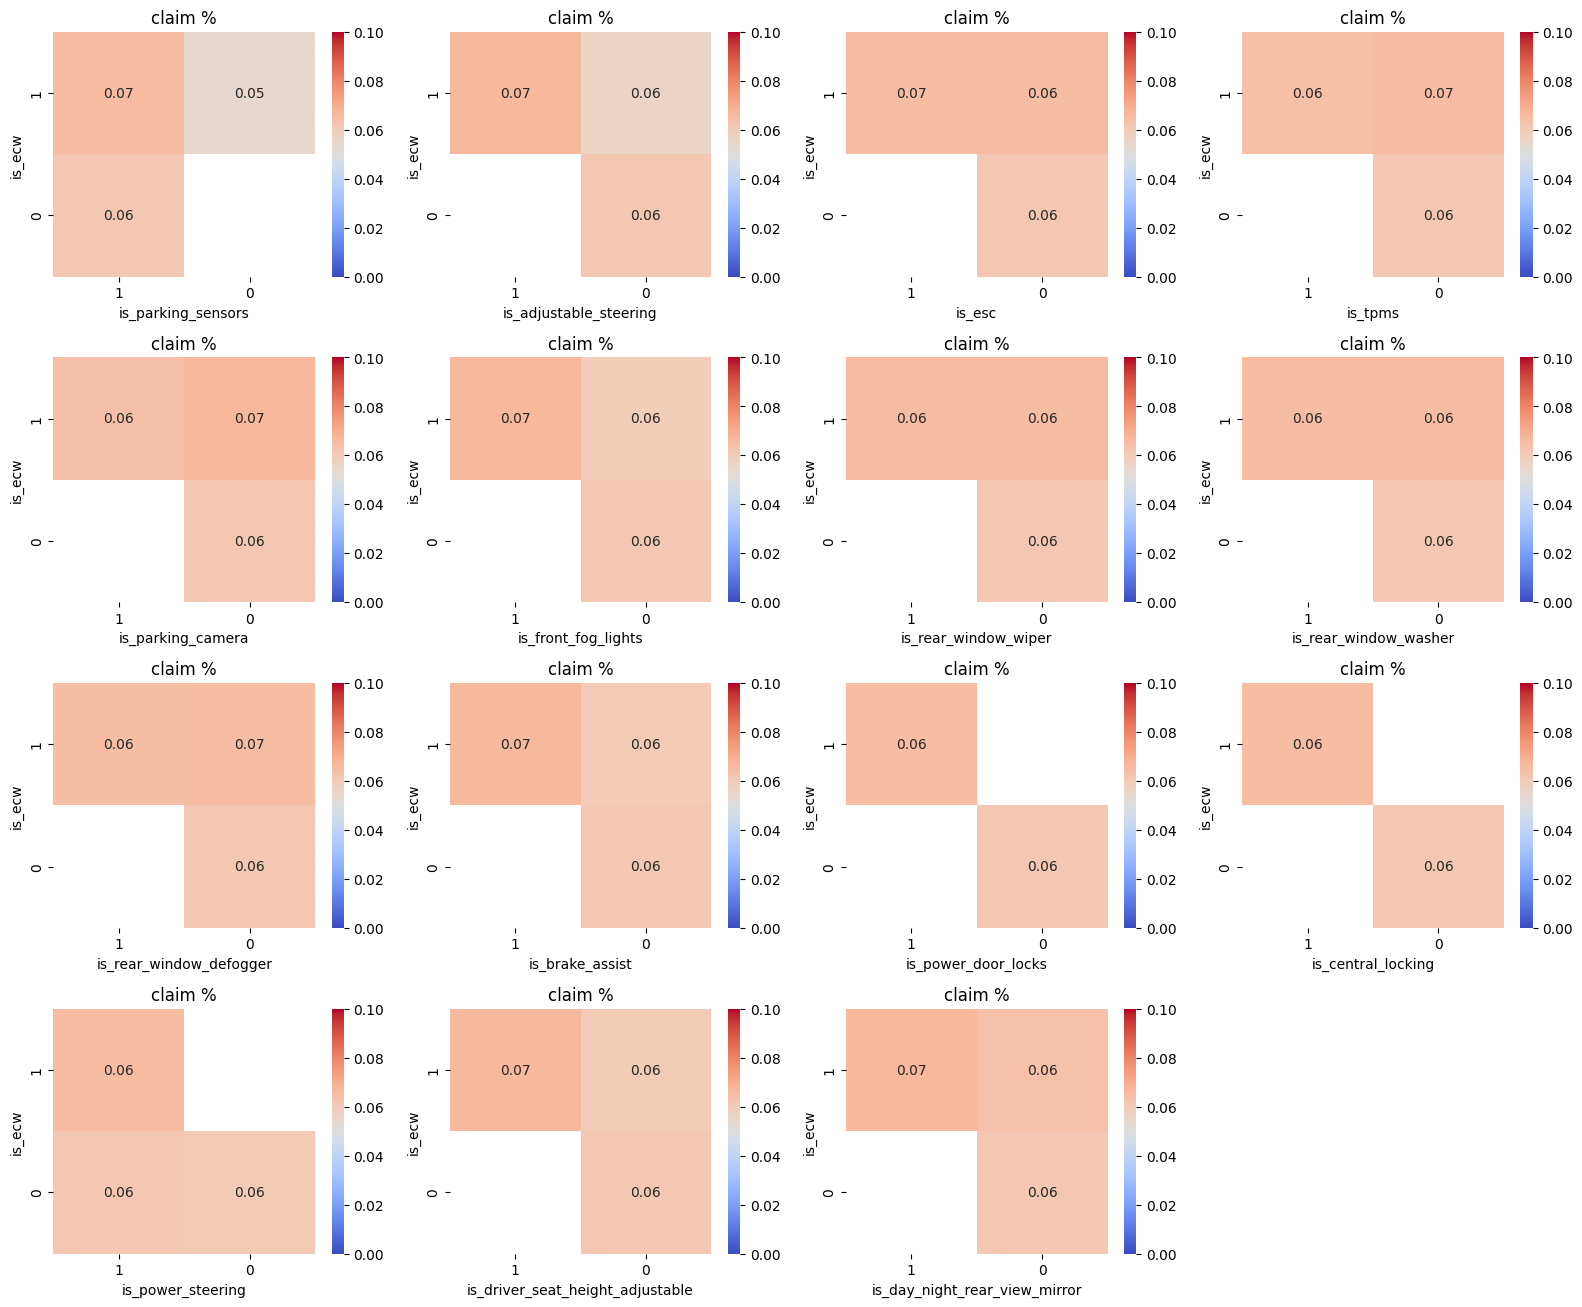

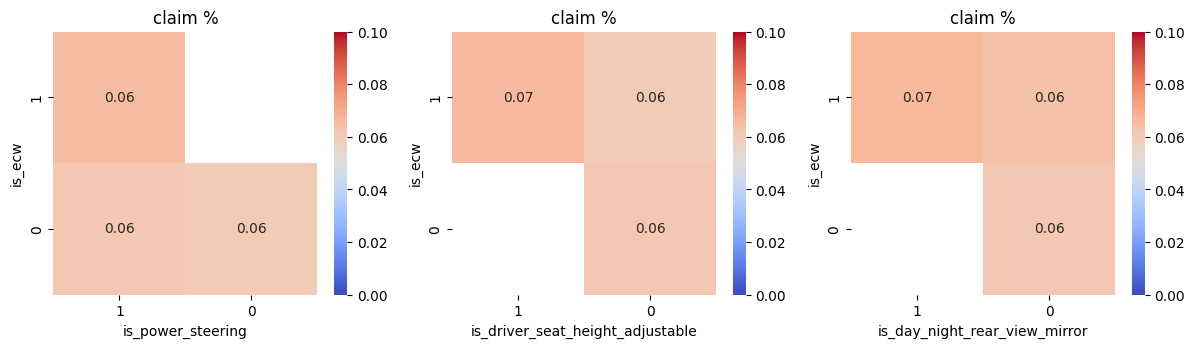

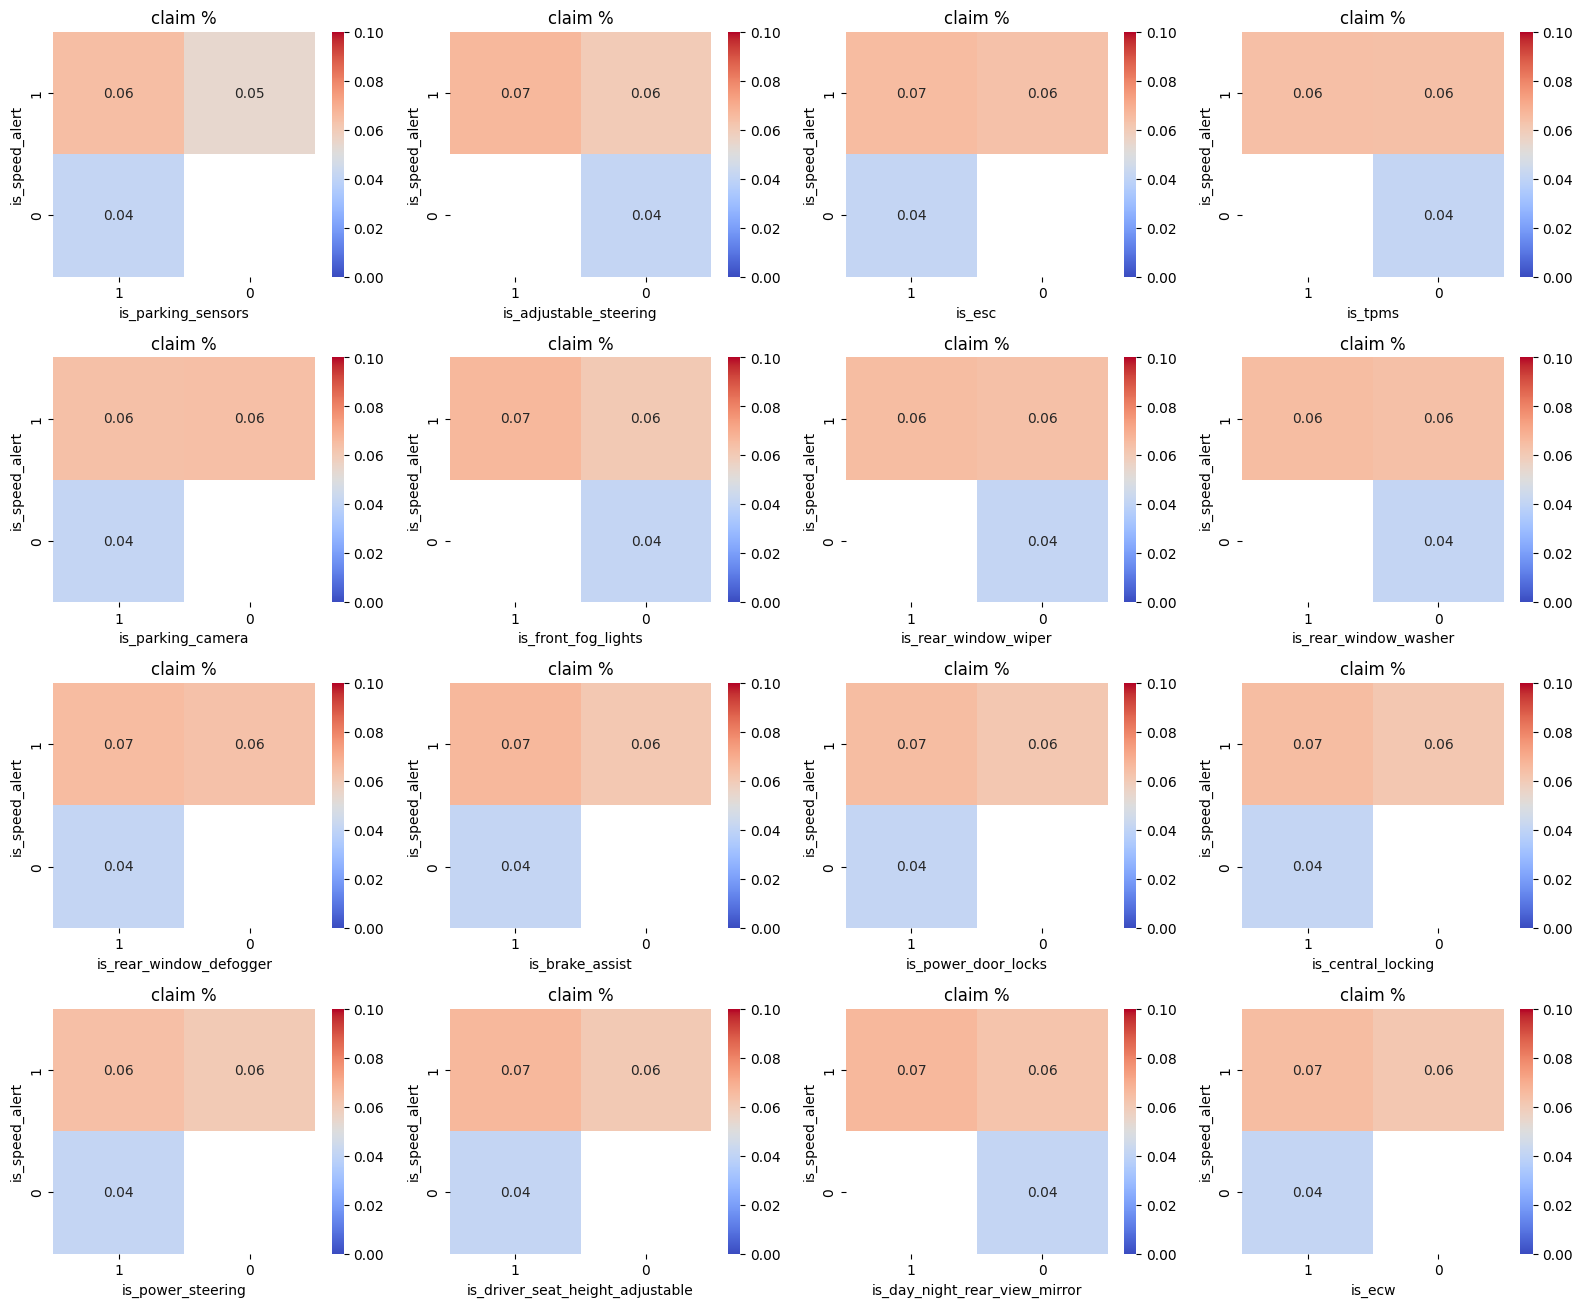

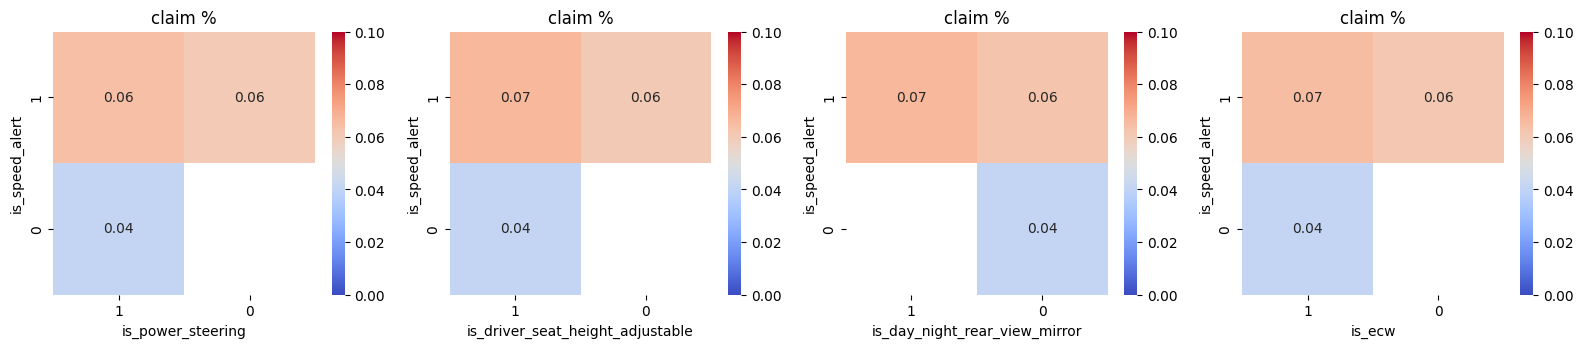

In [13]:
cols = ['is_parking_sensors', 'is_adjustable_steering', 
               'is_esc', 'is_tpms', 'is_parking_camera','is_front_fog_lights', 
               'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 
               'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 
               'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw',
               'is_speed_alert']

print(df['is_claim'].mean())
for i in range(0, len(cols)):
    for j in range(0, len(numerical_df.columns), 3*4):
        if j < i:
            plt.figure(figsize=(16, 16))
            for k in range(0, 5*4):
                if j + k < i:
                    plt.subplot(5, 4, k+1)
                    count_matrix = [
                        [df[(df[cols[i]] == 1) & (df[cols[j+k]] == 1)].is_claim.mean(), df[(df[cols[i]] == 1) & (df[cols[j+k]] == 0)].is_claim.mean()],
                        [df[(df[cols[i]] == 0) & (df[cols[j+k]] == 1)].is_claim.mean(), df[(df[cols[i]] == 0) & (df[cols[j+k]] == 0)].is_claim.mean()]
                    ]
                    count_matrix = np.array(count_matrix)
                    x_labels = ["1", "0"]
                    y_labels = ["1", "0"]
                    sns.heatmap(count_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.1)
                    plt.xlabel(cols[j+k])
                    plt.ylabel(cols[i])
                    plt.title('claim %')
            plt.tight_layout()
            plt.show()

# Models

## preprocessing training data

In [26]:
interesting_columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim']
interesting_df = numerical_df#[interesting_columns]

from sklearn.preprocessing import MinMaxScaler

x_train = interesting_df.drop('is_claim', axis=1)
y_train = interesting_df['is_claim']

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

## KNN

### Training

In [27]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

# accuracy on X_test
accuracy = knn.score(x_test, y_test)

print(accuracy)

0.9351480501749296


### evaluating

Text(0.5, 1.0, 'Confusion Matrix')

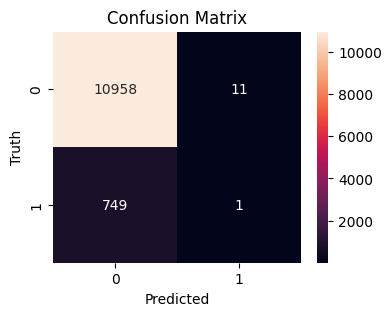

In [28]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
# plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

### optimizing columns

In [29]:
# ne run que sur un df avec peu de colonnes
"""
from sklearn.inspection import permutation_importance

result = permutation_importance(knn, x_test, y_test, n_repeats=10, random_state=42, n_jobs=5)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=interesting_df.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()

plt.show()
"""

KeyboardInterrupt: 